**<span style="font-size: 2em;">Marlow Case - DS TripleTen - Sprint 5 Project:</span>**

**<span style="font-size: 1.8em;">Ice Game Sales - Identifying Patterns of a Successful Game</span>**
_________________________________________________________________________________________________________________________________________________________

# Table of Contents #
<a id='contents'></a>
- [1. Introdcution](#intro)
- [2. Data Exploration](#explore)
- [3. Data Preprocessing](#process)
    - [Column Headers, Data Types & Dimensionality Reductions](#cols)
    - [Erroneous Values](#error_section)
    - [Missing Values](#missing)
        - [Name](#name)
        - [Year of Release](#year_of_release)
        - [Critic & User Scores](#scores)
        - [Rating](#rating)
- [4. Exploratory Data Analysis](#eda)
    - [Number of Games Released per Year](#per_year)
    - [Global Sales per Platform](#global)
    - [Effect of User & Critic Reviews on Sales](#score_effect)
    - [Sales of the Same Games from Different Platforms](#same_sales)
    - [Distribution of Sales of Games per Genre](#sales_per_genre)
- [5. Regional Sales Analysis](#region)
    - [Market Shares per Platform](#market_genre)
    - [Relationship between ESRB Rating and Game Sales](#rating_sales)
- [6. Hypothesis Testing](#hypo)
    - [Average User Scores of the Xbox One and PC Platforms are the Same](#hyp_1)
    - [Average User Scores for the Action and Sports Genres are Different](#hyp_2)
- [7. Conclusion](#conclusion)

## Introduction ##
<a id='intro'></a>
_________________________________________________________________________________________________________________________________________________________
This project tasks me to perform an analysis for the online gaming store Ice, which sells video games all over the world. I aim to use data over expert and user reviews; sales in North America, Japan, and Europe; platforms; and genres to identify patterns that determines whether a game succeeds or not. The purpose of this analysis is to allow Ice to plan a campaign for 2017. 

**This project aims to answer the following questions:**

    1. What are the patterns of a successful game?
    2. Which platforms are leading in sales?
    3. Do user and critic reviews affect scores?

## Data Exploration ##
<a id='explore'></a>
_________________________________________________________________________________________________________________________________________________________

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Load dataset
filepath = r"C:\Users\marlo\OneDrive\Desktop\Python_Work\Tripleten_Lessons\Sprint_5_Project"

try:
    df_games = pd.read_csv(f"{filepath}\\games.csv")
except:
    df_games = pd.read_csv('/datasets/games.csv')

In [3]:
# Quick overview of the dataset
df_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


According to the documentation, we need to change the column names to lowercase.

**Description of data per documentation:**

- `Name`: Name of the game
- `Platform`: Name of the console associated with Name
- `Year_of_Release`: The year the game released
- `Genre`: Genre associated with that game (Sports, Puzzle, Horror, etc)
- `NA_sales`: North American sales in millions of USD
- `EU_sales`: European sales in millions of USD
- `JP_sales`: Japanese sales in millions of USD
- `Other_Sales`: Sales in other countries in millions of USD
- `Critic_Score`: score alloted by critic with max score allowed being 100
- `User_Score`: score alloted by users with a max score allowed being 10
- `Rating`: standardized game rating providied by the ESRB (Mature, Teen, Everyone, etc.) 

In [4]:
# Check number of missing values
df_games.isna().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Notes over issues:**

- There are missing values in `Critic_Score`, `Rating`, `User_Score`, `Year_of_Release`, `Name`, and `Genre`.
- The data type of `Year_of_Release` should be *int64*
- The data type of `User_Score` and `Rating` should be *float_64*; *object* indicates a mixture of other data types. This needs to be investigated. 

In [6]:
# Look at numerical data
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


No obvious errors.

## Data Preprocessing ##
<a id='process'></a>
<a id='cols'></a>
_________________________________________________________________________________________________________________________________________________________

In [7]:
# Check for duplicates
df_games.duplicated().sum()

0

In [8]:
# Change column names to lower case
df_games.columns = df_games.columns.str.lower().str.strip()

df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
# Investigate why user_score is object
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

The `user_score` column appears to have a *"tbd"* non-numeric value. This stands for "To be determined" and is likely assigned in the case a game is under review, has no reviews, or possibly not enough reviews. In any case, we can treat this like null, so I will replace all instances of *"tbd"* with *"nan"*.

In [10]:
# Replace tbd with nan
df_games['user_score'].replace('tbd', np.nan, inplace=True)

# Change data type of column
df_games['user_score'] = df_games['user_score'].astype('float64')

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


According to (source: https://www.esrb.org/ratings-guide/), the ESRB rating system is defined as:

- `E`: Everyone
- `E10+`: Everyone Ages 10+
- `T`: Teen; Everyone Ages 13+
- `M`: Mature; Everyone Ages 17+
- `AO`: Adults Only; Everyone Ages 18+
- `RP`: Rating Pending; appears only in advertising for games not yet rated.

Retired ratings:
- `K-A`: Kids to Adults; Everyone; retired in 1998
- `eC`: Early Childhood; denoted content aimed towards a preschool audience; retired in 2018 due to underuse and that such content today would receive an E rating.
- `RP17+`: Rating Pending - Likely Mature 17+; retired in 2024; 

We will replace `K-A` and `eC` with `E` to maintain consistency. We can also replace `RP17+` with `RP` as needed. 

In [11]:
df_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [12]:
# Take a look at the counts
df_games['rating'].value_counts()

rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

In [13]:
# Replace K-A and EC with E
df_games['rating'].replace('K-A', 'E', inplace=True)
df_games['rating'].replace('EC', 'E', inplace=True)

df_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'RP'], dtype=object)

# Erroneous Values #
<a id="error_section"></a>

In [14]:
# Remove incorrect DS sale
drop_ds_index = df_games.query("platform == 'DS' and year_of_release == 1985").index
df_games = df_games.drop(index=drop_ds_index).reset_index(drop=True)

Explanation for removing these values:
[Here](#error_found)

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Super It would be nice if you add explanations why we need to remove these rows </div>

<div class="alert alert-block alert-info"> <b>It was discovered down below and is bookmarked to jump back here. I have added a bookmark to jump back down there.</b> <a class="tocSkip"></a> 
</div>

# Missing Values #
<a id='missing'></a>

In order to handle missing values, it is important to be aware of the following:

1. The percentage of the missing value
2. Whether the missing values show any patterns.
    - We can do this by comparing the distribution of the original data with the distribution of the data with the specific missing values to check if the missing values show any patterns.

From the info statement, we can see that `genre` and `name` both have 2 missing values. Let's investigate. 
<a id='name'></a>

In [15]:
# Create a function to calculate the number and percentage of missing values for a column
def calc_na(column):
    print(f"The number of missing values in {column}: {df_games[column].isna().sum()}")
    print(f"The percentage of missing values in {column} is {df_games[column].isna().mean():.2%}")

In [16]:
# Check the name column
calc_na('name')

The number of missing values in name: 2
The percentage of missing values in name is 0.01%


In [17]:
# Check the missing values
df_games.query("name.isna()")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Looks like `name` and `genre` share their two missing values. 

It would be pretty challenging to identify this game with this amount of missing values across all columns: **5** in total including `name`. Therefore I will drop these records from the dataset. 

In [18]:
# Drop the missing name (and genre) records
df_games = df_games.dropna(subset = ['name']).reset_index(drop=True)

df_games['name'].isna().sum()

0

In [19]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Let's take a look at `year_of_release` next.
<a id='year_of_release'></a>

In [20]:
calc_na('year_of_release')

The number of missing values in year_of_release: 269
The percentage of missing values in year_of_release is 1.61%


In [21]:
# Review some of the rows with missing values in year_of_release
year_na = df_games.query("year_of_release.isna()")

year_na.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Reviewing these rows with missing data in `year_of_release`, there are some factors to consider:

- `name`: There are quite a few popular titles in this list and it is highly unlikely that the years of release for those titles are unknown. Most popular games are released on multiple platforms as well and we may be able to use the `year_of_release` data from other platforms to fill in the missing values. 
- `platform`: Every platform has a life-span. So the `year_of_release` must lie within this life-span.
- `genre`: The popularity of a genre varies across time, for example, the `puzzle` genre was popular early on in video games' history, such as the 80s. 

The remaining variables, such as `sales`, `critic_score`, and `user_score` are unlikely to have any impact on the values of `year_of_release` since games must release before this data becomes available. 

In [22]:
# Count the number of platforms a game was released on
df_games['platform_count'] = df_games.groupby("name")['platform'].transform('count')

# Check for games with more than one platform
df_games.query("platform_count > 1")[['name','platform_count']].head(10)

,name,platform_count
1,Super Mario Bros.,2
5,Tetris,2
16,Grand Theft Auto V,5
17,Grand Theft Auto: San Andreas,4
18,Super Mario World,2
22,Super Mario Bros. 3,2
23,Grand Theft Auto V,5
24,Grand Theft Auto: Vice City,2
29,Call of Duty: Modern Warfare 3,4
31,Call of Duty: Black Ops 3,5


In [23]:
# Check if any of these titles have missing year_of_release
df_games.query("(platform_count > 1) & (year_of_release.isna())")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_count
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,4
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,4
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,7
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,4
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,4
...,...,...,...,...,...,...,...,...,...,...,...,...
16326,Brothers in Arms: Furious 4,X360,NaN,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,M,2
16370,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+,3
16402,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,3
16445,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,3


In [24]:
# Rock Band 
df_games.query("name == 'Rock Band'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_count
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T,4
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T,4
1141,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T,4
1839,Rock Band,PS2,NaN,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T,4


Using `Rock Band` as an example, we can see that every platform has a missing value for `year_of_release`. This would be a good example of a game we would manually fill. Let's look at another.  

In [25]:
# Lego Batman
df_games.query("name == 'LEGO Batman: The Videogame'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_count
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+,7
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+,7
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8.0,E10+,7
1518,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+,7
1537,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+,7
1552,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+,7
12464,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+,7


Here we can see that other platform releases contains `year_of_release` data for `Lego Batman`. Hence, some of the missing values in `year_of_release` can be filled based on games with the same name. 

Let's look at `platform` and see if that can be used to determine missing values in `year_of_release`.

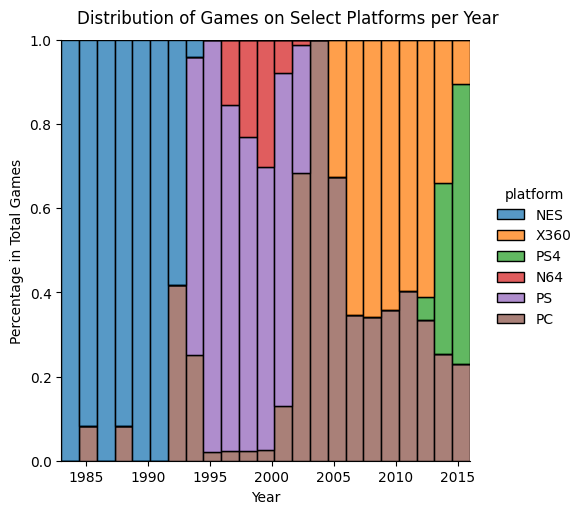

In [26]:
platforms_to_show = ['NES', 'N64', 'PS', 'X360', 'PS4', 'PC']

filt_df = df_games[df_games['platform'].isin(platforms_to_show)]



games_on_plat = sns.displot(data = filt_df, 
                            x='year_of_release', 
                            hue='platform', 
                            height=5, 
                            multiple='fill')

games_on_plat.fig.suptitle('Distribution of Games on Select Platforms per Year', y=1.02)
games_on_plat.set_axis_labels('Year', 'Percentage in Total Games')

plt.show()

Including all titles creates an illegible histogram, but only including a few slect platforms, we can see that platforms only released games within a certain period (that console's lifespan). However, `year_of_release` is an important statistic in our data and we want to keep these values as accurate as possible. The `platform` factor does not appear to provide a precise enough value for us to use in filling missing values within this column. 

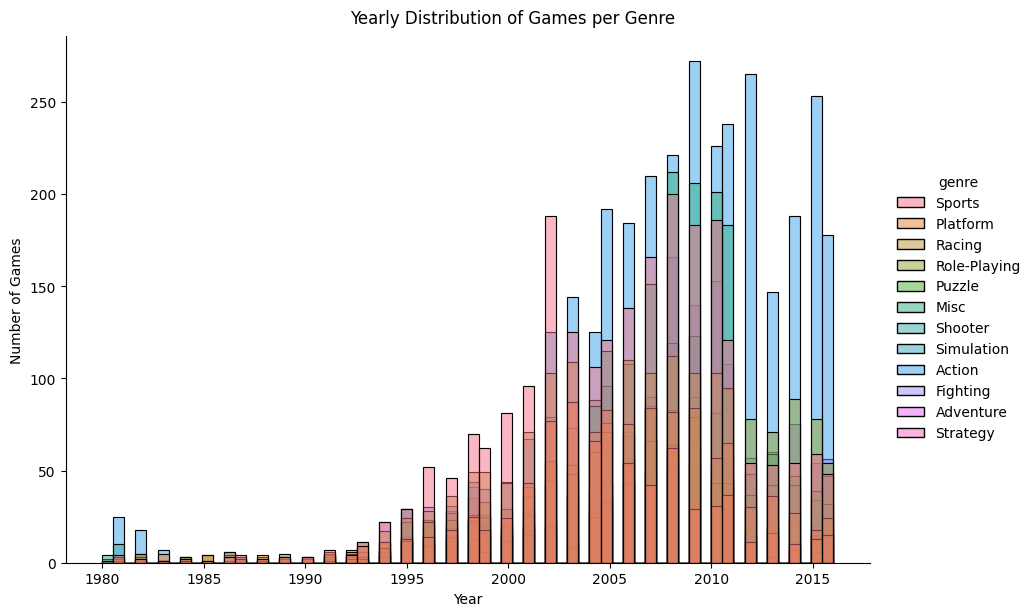

In [27]:
# Plot a histogram to show the distribution of game counts per genre
genre_on_plat = sns.displot(data = df_games, 
                            x='year_of_release',
                            hue='genre', 
                            height=6,
                            aspect=1.5)

genre_on_plat.fig.suptitle('Yearly Distribution of Games per Genre', y=1.02)
genre_on_plat.set_axis_labels('Year', 'Number of Games')

plt.show()

From the histogram, the only visible genre shifts are `RPG/Sports/Simulation` being popular until the early 2000s, and then a pivot to more `Action` and `Shooter` style games. While `Platform` being consistent throughout all decades, but not holding a majority in popular since the late 90s. 

In conclusion, out of the three potential variables, `name` will be used to fill in the missing values for `year_of_release`. I will use the median year from the other rows with the same game-name, but different platforms. The median is chosen to avoid any potential outliers that may come up when rereleases are concerned with older titles. 

In [28]:
# Fill in missing values in year_of_release based on the median year of the same game name
df_games['year_of_release'] = df_games['year_of_release'].fillna(
    df_games.groupby('name')['year_of_release'].transform('median').round())

#check year_of_release
calc_na('year_of_release')

The number of missing values in year_of_release: 146
The percentage of missing values in year_of_release is 0.87%


These remaining 146 values cannot be filled quickly in a manual methods - it could be done - but for the purposes of this project they will be removed.

In [29]:
# Check year_of_release column
df_games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.,   nan])

In [30]:
# Remove the samll percentage of remaining missing values in year_of_release - dropna() was not working
year_nan = df_games.query("year_of_release.isna()")
#year_nan

df_games = df_games.drop(index= year_nan.index)

# Change data type from float
df_games['year_of_release'] = df_games['year_of_release'].astype('int')

# Check
calc_na('year_of_release')

The number of missing values in year_of_release: 0
The percentage of missing values in year_of_release is 0.00%


In [31]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16566 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16566 non-null  object 
 1   platform         16566 non-null  object 
 2   year_of_release  16566 non-null  int32  
 3   genre            16566 non-null  object 
 4   na_sales         16566 non-null  float64
 5   eu_sales         16566 non-null  float64
 6   jp_sales         16566 non-null  float64
 7   other_sales      16566 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
 11  platform_count   16566 non-null  int64  
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 1.6+ MB


Let's now look at `critic_score` and `user_score`.
<a id='scores'></a>

In [32]:
# Find number and percentage of missing values
calc_na('critic_score')

The number of missing values in critic_score: 8491
The percentage of missing values in critic_score is 51.26%


Wow! More than half of this column contains missing data. Let's investigate further. 

In [33]:
critic_na = df_games.query("critic_score.isna()")

critic_na.tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_count
16701,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.0,NaN,NaN,E,1
16703,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.0,NaN,NaN,T,2
16704,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN,1
16705,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN,1
16706,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN,4
16707,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN,3
16708,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN,1
16709,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN,1
16710,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN,2
16711,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN,2


It appears that missing values in `critic_score` tend to line up with missing values in `user_score` and `rating`. Let's take a look at the describe data for both the original data and the `critic_na` data to see if we can identify any patterns. 

In [34]:
print('Original Data')
df_games.describe()

Original Data


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,platform_count
count,16566.000000,16566.000000,16566.000000,16566.000000,16566.000000,8075.000000,7540.000000,16566.000000
mean,2006.491730,0.263991,0.145823,0.078024,0.047570,68.991950,7.125027,2.132440
std,5.860489,0.816496,0.505378,0.310077,0.187482,13.923383,1.498254,1.598547
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,1.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,1.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,1.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,3.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,12.000000


In [35]:
print('critic_na data')
critic_na.describe()

critic_na data


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,platform_count
count,8491.000000,8491.000000,8491.000000,8491.000000,8491.000000,0.0,571.000000,8491.000000
mean,2005.830055,0.178478,0.085511,0.099627,0.023664,NaN,6.421891,1.742315
std,7.033520,0.718931,0.322342,0.345507,0.089065,NaN,1.957799,1.361259
min,1980.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,2001.000000,0.000000,0.000000,0.000000,0.000000,NaN,5.300000,1.000000
50%,2008.000000,0.020000,0.000000,0.000000,0.000000,NaN,7.000000,1.000000
75%,2011.000000,0.140000,0.050000,0.070000,0.020000,NaN,7.900000,2.000000
max,2016.000000,29.080000,10.950000,10.220000,2.740000,NaN,9.700000,12.000000


Overall, these distributions are quite similar except for the `na_sales` and `eu_sales`. When comparing these two columns we can see that there are far less reviews in North America and Europe where the game has lower sales correlating to its popularity (in most cases). 

Another point to mention, is that reviews, both professional and user, would grow in popularity with the internet boom in the 2000s, so we could expect to see less reviews in early game history. However, there is not enough evidence in the tables above to support this claim, but we can check it by creating a new table. 

In [36]:
# Find min and max year_of_release
print("The maximum year_of_release is", df_games['year_of_release'].max())
print("The minimum year_of_release is", df_games['year_of_release'].min())

The maximum year_of_release is 2016
The minimum year_of_release is 1980


In [37]:
# Create function that assigns decade
def assign_decade(year):
    if pd.isna(year):
        return np.nan
    if 1980 <= year < 1990:
        return "1980s"
    elif 1990 <= year < 2000:
        return "1990s"
    elif 2000 <= year < 2010:
        return "2000s"
    else:
        return "2010s"

In [38]:
# Assign the decade value in a new column
df_games['decade'] = df_games['year_of_release'].apply(assign_decade)

# Check results
df_games[['year_of_release','decade']].head()

,year_of_release,decade
0,2006,2000s
1,1985,1980s
2,2008,2000s
3,2009,2000s
4,1996,1990s


In [39]:
# Create a table that calculates the number of games with reviews in each decade
decade_critic = df_games.pivot_table(index = 'decade',
                                     values= ['name','critic_score'],
                                     aggfunc= 'count').reset_index()

decade_critic.columns = ['Decade','Games w/ Critic Score','Total Games']
decade_critic.head()

,Decade,Games w/ Critic Score,Total Games
0,1980s,2,204
1,1990s,94,1771
2,2000s,5639,9270
3,2010s,2340,5321


In [40]:
decade_critic['Percentage Reviewed'] = (decade_critic['Games w/ Critic Score'] / decade_critic['Total Games']) * 100

decade_critic

,Decade,Games w/ Critic Score,Total Games,Percentage Reviewed
0,1980s,2,204,0.980392
1,1990s,94,1771,5.307736
2,2000s,5639,9270,60.830636
3,2010s,2340,5321,43.976696


We can see that our theory relatively holds true despite the dip in the `2010s` which goes against our expectations. Regardless, there are significantly less reviews in the early history of video games. 

Similarly, we can expect similar results for `user_score`. If this happens to be true, we can address the missing values in the same manner for these columns. Let's check. 

In [41]:
calc_na('user_score')

The number of missing values in user_score: 9026
The percentage of missing values in user_score is 54.49%


In [42]:
print('Original Data')
df_games.describe()

Original Data


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,platform_count
count,16566.000000,16566.000000,16566.000000,16566.000000,16566.000000,8075.000000,7540.000000,16566.000000
mean,2006.491730,0.263991,0.145823,0.078024,0.047570,68.991950,7.125027,2.132440
std,5.860489,0.816496,0.505378,0.310077,0.187482,13.923383,1.498254,1.598547
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,1.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,1.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,1.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,3.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,12.000000


In [43]:
print('user_score_na data')
user_na = df_games.query("user_score.isna()")
user_na.describe()

user_score_na data


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,platform_count
count,9026.000000,9026.000000,9026.000000,9026.000000,9026.000000,1106.000000,0.0,9026.000000
mean,2005.500886,0.169764,0.079064,0.093638,0.020787,61.009042,NaN,1.694438
std,6.745475,0.695685,0.308078,0.335987,0.082264,11.383242,NaN,1.252378
min,1980.000000,0.000000,0.000000,0.000000,0.000000,23.000000,NaN,1.000000
25%,2001.000000,0.000000,0.000000,0.000000,0.000000,54.000000,NaN,1.000000
50%,2007.000000,0.030000,0.000000,0.000000,0.000000,62.000000,NaN,1.000000
75%,2010.000000,0.130000,0.050000,0.060000,0.010000,69.000000,NaN,2.000000
max,2016.000000,29.080000,10.950000,10.220000,2.740000,90.000000,NaN,12.000000


The distribution for the `user_na_data` closely resembles that of the `critic_na_data`. Therefore we can address the missing values for both columns in a similar manner. Let's take another look at the data where `critic_score` and `user_score` are missing. 

In [44]:
df_games.query("critic_score.isna() & user_score.isna()").head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_count,decade
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,2,1980s
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1,1990s
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,2,1980s
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,1,1980s
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,1,2000s
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,1,1990s
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,2,1990s
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,1,2000s
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,1,1980s
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,2,1980s


Looking at this data, where `critic_score` and `user_score` are missing, there are three potential dependent factors that we will consider:
- `sales`: If the game has higher review scores, we would expect sales to be higher.
- `genre`: We can suspect that some genres may have extreme high or low scores due to their content. For example, in our histogram we could see that the `action` game genre has been dominant except for a period in the `1990s`, it is possible that `action` games will have high `critic_scores` due to this preference.
- `rating`: Similarly to `genre`, games of different ratings will have different content. An `E` rated game could be less popular due to the restricted content and end up recieving a low score. 

In order to distinguish which of these potential dependent factors may affect score values, we will calculate the correlation coefficients for the numerical columns and comparing the medians and means for the categorical factors. 

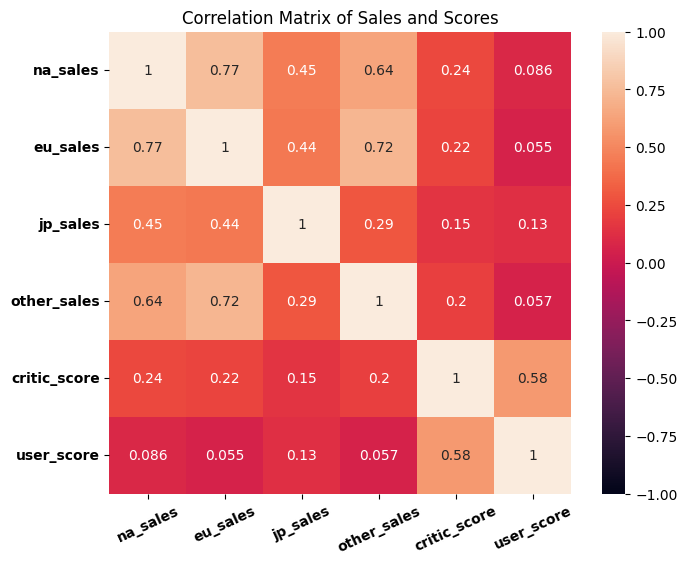

In [45]:
# Calculate correlation matrix for the numerical variables
num_vars = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']

plt.figure(figsize=(8,6))

sns.heatmap(df_games[num_vars].corr(), vmin = -1, square = True, annot = True)

plt.title('Correlation Matrix of Sales and Scores')
plt.xticks(rotation=25, fontweight = 'bold')
plt.yticks(rotation=0, fontweight = 'bold')

plt.show()

Observing the last two rows it appears there is a weak connection between scores and sales. Thus, the missing values cannot be filled based on the sales. However we can see that there is a moderate connection between `critic_score` and `user_score`, therefore we could use the data between them to fill in missing values if necessary. We will table this for now. 

In [46]:
# Function to calculate mean, median, and count for selected columns for a groupby on main data
def group_mean_median(groupby, column_list):

    for element in column_list:        
        print(element)
        display(df_games.groupby(groupby)[element]
                    .agg(['count', 'mean', 'median']) 
                    .sort_values('count', ascending = False)
                    .reset_index()
               )

In [47]:
group_mean_median('genre', ['critic_score','user_score'])

critic_score


,genre,count,mean,median
0,Action,1878,66.658147,68.0
1,Sports,1188,71.999158,75.0
2,Shooter,935,70.284492,73.0
3,Racing,735,68.032653,69.0
4,Role-Playing,732,72.672131,74.0
5,Misc,516,66.560078,69.0
6,Platform,491,68.073320,69.0
7,Fighting,408,69.250000,72.0
8,Simulation,349,68.595989,70.0
9,Adventure,321,65.271028,66.0


user_score


,genre,count,mean,median
0,Action,1820,7.056484,7.4
1,Sports,1098,6.956375,7.4
2,Shooter,917,7.045802,7.4
3,Role-Playing,738,7.623442,7.8
4,Racing,637,7.039874,7.4
5,Misc,434,6.809677,7.1
6,Platform,425,7.298353,7.7
7,Fighting,398,7.299497,7.6
8,Simulation,340,7.127353,7.5
9,Strategy,308,7.299026,7.8


 The mean and median `score` across all genres do not vary substantially. Therefore, `genre` is not a dependent factor. Let's look at rating. 

In [48]:
group_mean_median('rating', ['critic_score','user_score'])

critic_score


,rating,count,mean,median
0,E,2789,68.520975,70.0
1,T,2612,68.870597,71.0
2,M,1474,71.804613,74.0
3,E10+,1115,66.730942,68.0
4,RP,2,64.000000,64.0
5,AO,1,93.000000,93.0


user_score


,rating,count,mean,median
0,T,2536,7.290063,7.6
1,E,2368,7.048691,7.5
2,M,1509,7.162425,7.5
3,E10+,1040,6.854712,7.1
4,AO,1,8.600000,8.6
5,RP,1,6.800000,6.8


Same conclusion is made here that was made for `genre`. Therefore, `rating` is also not a dependent factor. 

**In conclusion:**

It appears that neither `sales`, `genre`, or `rating` are dependent factors on review scores for either professional or user reviews. Therefore we will fall back on our conclusion made in the coefficient matrix.

It is not unreasonable to assume that the `critic_score` and `user_score` of a game should be similar in value, regardless of the platform - as reviews should not vary too much for an individual game across platforms except for hardware performance issues - which is not necessarily the games' fault - but that's a whole other discussion and not our focus here. 

In order to fill missing values without introducing a significant bias, we will fill **the missing values in `critic_score` with** 
1. the median `critic_score` from the same `game name` but different `platform`
2. the `user_score` from the same `game name` and same `platform`
3. the median `user_score` from the same `game name` but different `platform`

and we will fill **the missing values in `user_score` similarly with**
1. the median `user_score` from the same `game name` but different `platform`
2. the `critic_score` from the same `game name` and same `platform`
3. the median `critic_score` from the same `game name` but different `platform`

To achieve the most accuracy, the scores are numbered in the order we will fill the missing values. The median is chosen to avoid outliers when some critics or users gave extreme high or low scores. Also, since the missing values in the two columns are going to be filled based on eachotehr, we will need to create new columns instead of filling the current ones, to avoid missing values being filled based on the 'fixed missing values'.

In [49]:
# Create the new columns
df_games['critic_score_fix'] = df_games['critic_score']
df_games['user_score_fix'] = df_games['user_score']

# Fill the missing values with the critic_score from the same game but different platforms 1.1
df_games.loc[df_games['critic_score_fix'].isna(), 'critic_score_fix'] = (
    df_games.groupby('name')['critic_score'].transform('median').round())

# Fill missing values with user_score from same game but different platform 2.1
df_games.loc[df_games['user_score_fix'].isna(), 'user_score_fix'] = (
    df_games.groupby('name')['user_score'].transform('median').round())

# Check remaining missing values
calc_na('critic_score_fix')
print('-'*100)
calc_na('user_score_fix')

The number of missing values in critic_score_fix: 7531
The percentage of missing values in critic_score_fix is 45.46%
----------------------------------------------------------------------------------------------------
The number of missing values in user_score_fix: 7927
The percentage of missing values in user_score_fix is 47.85%


In [50]:
# Fill missing values with user_score from same game and same platform - 1.2
# Please note that max value for critic is 100 and max value for user is 10 
df_games.loc[df_games['critic_score_fix'].isna(), 'critic_score_fix'] = df_games['user_score'] * 10

#Fill missing values with critic_score from same game and same platform 2.2
df_games.loc[df_games['user_score_fix'].isna(), 'user_score_fix'] = df_games['critic_score'] / 10

# Check
calc_na('critic_score_fix')
print('-'*100)
calc_na('user_score_fix')

The number of missing values in critic_score_fix: 7296
The percentage of missing values in critic_score_fix is 44.04%
----------------------------------------------------------------------------------------------------
The number of missing values in user_score_fix: 7275
The percentage of missing values in user_score_fix is 43.92%


In [51]:
# Fill in mising values with the median user_score from same game but different platforms 1.3
trans_median_crit = df_games.groupby('name')['user_score'].transform(
    lambda x: round(x.fillna(np.nan).median(), 1) * 10 if not x.dropna().empty else np.nan)

df_games.loc[df_games['critic_score_fix'].isna(), 'critic_score_fix'] = trans_median_crit


# Fill in missing values with the median critic_score from same game but different platforms
trans_median_user = df_games.groupby('name')['critic_score'].transform(
    lambda x: round(x.fillna(np.nan).median(), 1) / 10 if not x.dropna().empty else np.nan)

df_games.loc[df_games['user_score_fix'].isna(), 'user_score_fix'] = trans_median_user

# check
calc_na('critic_score_fix')
print('-'*100)
calc_na('user_score_fix')

The number of missing values in critic_score_fix: 7196
The percentage of missing values in critic_score_fix is 43.44%
----------------------------------------------------------------------------------------------------
The number of missing values in user_score_fix: 7196
The percentage of missing values in user_score_fix is 43.44%


In [52]:
# Check the unique values
print(df_games['critic_score_fix'].unique())
print('-'*100)
print(df_games['user_score_fix'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 42. 67. 81. 66. 56.
 43. 79. 70. 59. 64. 75. 60. 63. 69. 50. 25. 44. 55. 48. 57. 29. 47. 65.
 54. 20. 53. 37. 52. 38. 33. 30. 32. 45. 51. 40. 46. 39. 34.  0. 35. 41.
 36. 28. 31. 11. 27. 26. 13. 19. 14. 23. 24. 21. 17.  9.  3.  2. 12.  6.
 18.]
----------------------------------------------------------------------------------------------------
[ 8.     nan  8.3   8.5   6.6   8.4   8.6   7.7   6.3   7.4   8.2   9.
  7.9   8.1   8.7   7.1   3.4   5.3   4.8   3.2   8.9   6.4   7.8   7.5
  2.6   7.2   9.2   7.    7.3   4.3   7.6   5.7   5.    9.1   6.5   8.8
  6.9   9.4   6.8   6.1   6.7   5.4   4.    4.9   4.5   9.3   6.2   4.2
  6.    3.7   4.1   5.8   5.6   5.5   4.4   4.6   5.9   3.9   3.1   2.9
  5.2   3.3   2.    4.7   5.1   3.5   2.5   1.9   3.    2.7   2.2   9.5
  2.1   3.6  10.    2.8   1.8   3.8   0.    1.6   9.6   2.4   1.7   1.1
  0.3   1.    7.15  1.5  

Data is looking good. However, there are over 7000 null values remaining in these two columns. With this amount of missing values, it is unwise to fill the missing values with any mean or median as this would result in a loss of variation and skew the data distribution in a significant way. The remaining values will stay as nulls. 

Let's take a look at `rating`.
<a id='rating'></a>

In [53]:
# Find the number and percentage of missing values
calc_na('rating')

The number of missing values in rating: 6698
The percentage of missing values in rating is 40.43%


In [54]:
# Compare distributions
print('Original Data')
df_games.describe()

Original Data


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,platform_count,critic_score_fix,user_score_fix
count,16566.000000,16566.000000,16566.000000,16566.000000,16566.000000,8075.000000,7540.000000,16566.000000,9370.000000,9370.000000
mean,2006.491730,0.263991,0.145823,0.078024,0.047570,68.991950,7.125027,2.132440,68.667876,7.002332
std,5.860489,0.816496,0.505378,0.310077,0.187482,13.923383,1.498254,1.598547,14.411324,1.515881
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,1.000000,60.000000,6.100000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,1.000000,71.000000,7.300000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,3.000000,80.000000,8.100000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,12.000000,98.000000,10.000000


In [55]:
print('rating_na_data')
rating_na_data = df_games.query("rating.isna()")

rating_na_data.describe()

rating_na_data


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,platform_count,critic_score_fix,user_score_fix
count,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,82.000000,85.000000,6698.000000,457.000000,457.000000
mean,2004.896387,0.183510,0.091132,0.125167,0.022428,68.890244,6.957647,1.527471,70.967177,7.218162
std,7.480981,0.799355,0.349396,0.384746,0.092445,12.457341,1.439773,1.104476,13.839977,1.438844
min,1980.000000,0.000000,0.000000,0.000000,0.000000,31.000000,3.100000,1.000000,23.000000,2.000000
25%,1999.000000,0.000000,0.000000,0.000000,0.000000,62.000000,6.100000,1.000000,62.000000,6.300000
50%,2007.000000,0.000000,0.000000,0.020000,0.000000,70.000000,7.300000,1.000000,73.000000,8.000000
75%,2011.000000,0.120000,0.050000,0.100000,0.010000,77.750000,8.100000,2.000000,82.000000,8.000000
max,2016.000000,29.080000,10.950000,10.220000,2.740000,93.000000,9.200000,12.000000,97.000000,10.000000


Some possible dependent factors:
- `name`: Similarly to year_of_release, `rating` could depend on the name of the game. 
- `genre`: `rating` is a content based data-point, `genre` is also a content-based data point. It's possible these two values could depend on each other. 
- `platform`: Some platforms are designed to target certain age groups, such as Nintendo being for younger/casual audiences, therefore `platform` also depends on content. 

We need to check whether `genre` or `platform` have an effect on the values of `rating` before filling any missing values. 
Let's begin with a distribution. 

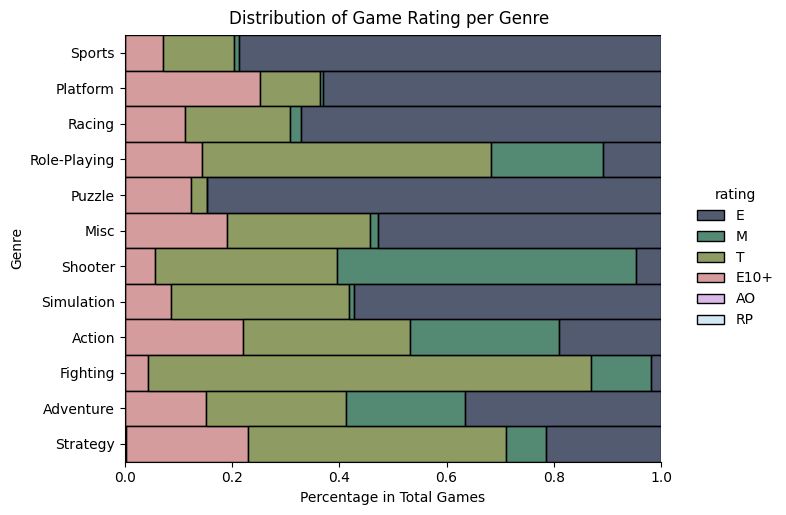

In [56]:
# Plot a filled bar chart to show distribution of game rating per genre
rating_genre_dis = sns.displot(data=df_games, y='genre', hue='rating', aspect=1.4, multiple='fill', palette='cubehelix')

rating_genre_dis.fig.suptitle('Distribution of Game Rating per Genre', y=1.02)
rating_genre_dis.set_axis_labels('Percentage in Total Games', 'Genre')

plt.show()

For the bar chart above, it is quite evident that each `genre` tends to be associated with certain dominant `rating` values. For example, `sport` games predominantly feature an `E` rating whereas `fighting` games primarily feature a `T` rating. Despite this, just like `year_of_release`, `rating` plays an important role in providing an accurate analysis and we cannot make any conclusions on filling in missing values based on `genre`. 

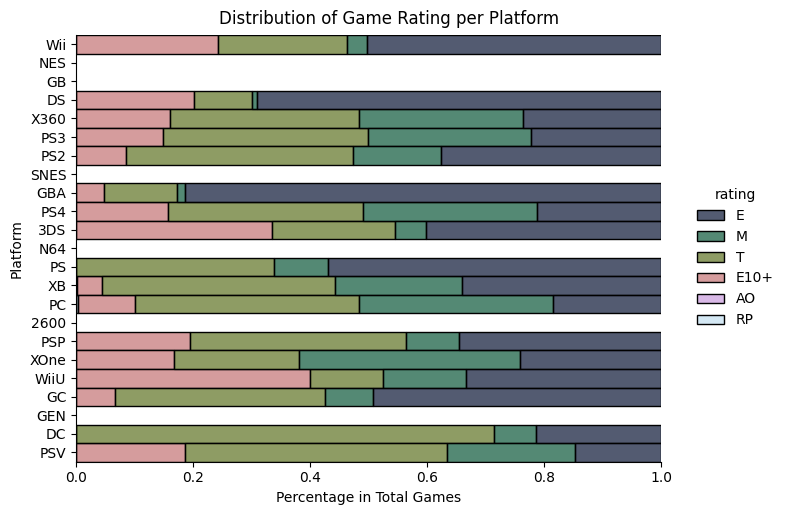

In [57]:
# Plot a filled bar chart to show distribution of game rating per platform
rating_genre_dis = sns.displot(data=df_games, y='platform', hue='rating', aspect=1.4, multiple='fill', palette='cubehelix')

rating_genre_dis.fig.suptitle('Distribution of Game Rating per Platform', y=1.02)
rating_genre_dis.set_axis_labels('Percentage in Total Games', 'Platform')

plt.show()

As we would expect, most platforms have their primary focus for game content. Thus, the games from each platform have certain rating values. For example, most games on the `DC` are rated `T`, and most games on the `DS` and `GBA` are rated `E`. Even though this provides some decent insight, it is still not adequate for computing missing values in `rating` without being precise. 

Also, I find it interesting that some older platforms are not even featured on this chart. ESRB started in 1994, so for the much older consoles, it makes sense, but `N64` released in the late 90s, and most if not all `N64` cartridges have an ESRB rating if it was manufactured in America. Regardless, this does tell us that some nulls depend on `year_of_release`.

In [58]:
# Platforms that do not have ESRB values
platform_no_rate = df_games.groupby('platform')['rating'].count().sort_values()
platform_no_rate

platform
2600       0
PCFX       0
SCD        0
NG         0
NES        0
N64        0
GG         0
SAT        0
GEN        0
TG16       0
GB         0
WS         0
3DO        0
SNES       0
DC        14
WiiU     105
PSV      150
XOne     186
PS       204
3DS      224
PS4      255
GC       467
GBA      516
PSP      544
XB       727
PC       770
PS3      945
Wii      989
X360    1043
DS      1261
PS2     1468
Name: rating, dtype: int64

**Conclusion**

The `name` is the only dependent factor which will be used to compute the missing values in `genre`. We will employ the same methods used in `year_of_release`, except we will use the mode. 

In [59]:
# fill missing values with the mode of rating from the same game but different platforms
def mode_function(series):
    mode = series.mode()
    return mode[0] if not mode.empty else np.nan

mode_ratings = df_games.groupby('name')['rating'].apply(mode_function)

def fill_missing_rating(row):
    if pd.isna(row['rating']):
        return mode_ratings[row['name']]
    return row['rating']

df_games['rating'] = df_games.apply(fill_missing_rating, axis=1)

In [60]:
# check 007 - look at titles with the same name and confirm all have a rating
df_games[df_games['name'].str.contains(r'\b007\b', na=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_count,decade,critic_score_fix,user_score_fix
3756,007 Racing,PS,2000,Racing,0.30,0.20,0.00,0.03,51.0,4.6,T,1,2000s,51.0,4.6
3119,007: Quantum of Solace,Wii,2008,Action,0.29,0.28,0.01,0.07,54.0,7.5,T,6,2000s,54.0,7.5
9506,007: Quantum of Solace,DS,2008,Action,0.11,0.01,0.00,0.01,65.0,NaN,T,6,2000s,65.0,7.0
4474,007: Quantum of Solace,PS2,2008,Action,0.17,0.00,0.00,0.26,NaN,NaN,T,6,2000s,65.0,7.0
14656,007: Quantum of Solace,PC,2008,Action,0.01,0.01,0.00,0.00,70.0,6.3,T,6,2000s,70.0,6.3
1284,007: Quantum of Solace,X360,2008,Action,0.82,0.51,0.01,0.14,65.0,7.1,T,6,2000s,65.0,7.1
1784,007: Quantum of Solace,PS3,2008,Action,0.43,0.51,0.02,0.19,65.0,6.6,T,6,2000s,65.0,6.6
1203,007: The World is not Enough,N64,2000,Action,1.13,0.38,0.02,0.03,NaN,NaN,T,2,2000s,61.0,7.0
2242,007: The World is not Enough,PS,2000,Action,0.51,0.35,0.00,0.06,61.0,6.7,T,2,2000s,61.0,6.7
423,007: Tomorrow Never Dies,PS,1999,Shooter,1.72,1.33,0.00,0.16,NaN,NaN,NaN,1,1990s,NaN,NaN


In [61]:
calc_na('rating')
print("\nUnique Rating Values: \n", df_games['rating'].unique())

The number of missing values in rating: 6261
The percentage of missing values in rating is 37.79%

Unique Rating Values: 
 ['E' nan 'M' 'T' 'E10+' 'AO' 'RP']


The remaining null values in `rating` will be filled with "unknown."

In [62]:
# Fill in remaining missing values with "unknown"
df_games['rating'] = df_games['rating'].fillna("unknown")

In [63]:
# Final check on missing values
df_games.isna().sum().sort_values(ascending = False)

user_score          9026
critic_score        8491
critic_score_fix    7196
user_score_fix      7196
name                   0
platform               0
year_of_release        0
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
rating                 0
platform_count         0
decade                 0
dtype: int64

In [64]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16566 entries, 0 to 16711
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16566 non-null  object 
 1   platform          16566 non-null  object 
 2   year_of_release   16566 non-null  int32  
 3   genre             16566 non-null  object 
 4   na_sales          16566 non-null  float64
 5   eu_sales          16566 non-null  float64
 6   jp_sales          16566 non-null  float64
 7   other_sales       16566 non-null  float64
 8   critic_score      8075 non-null   float64
 9   user_score        7540 non-null   float64
 10  rating            16566 non-null  object 
 11  platform_count    16566 non-null  int64  
 12  decade            16566 non-null  object 
 13  critic_score_fix  9370 non-null   float64
 14  user_score_fix    9370 non-null   float64
dtypes: float64(8), int32(1), int64(1), object(5)
memory usage: 2.5+ MB


In [65]:
# Create a total sales column
df_games['global_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
sales_only = df_games[['name', 'global_sales','na_sales','eu_sales','jp_sales','other_sales']]
sales_only.head(10).sort_values(by='global_sales', ascending = False)

,name,global_sales,na_sales,eu_sales,jp_sales,other_sales
0,Wii Sports,82.54,41.36,28.96,3.77,8.45
1,Super Mario Bros.,40.24,29.08,3.58,6.81,0.77
2,Mario Kart Wii,35.52,15.68,12.76,3.79,3.29
3,Wii Sports Resort,32.77,15.61,10.93,3.28,2.95
4,Pokemon Red/Pokemon Blue,31.38,11.27,8.89,10.22,1.00
5,Tetris,30.26,23.20,2.26,4.22,0.58
6,New Super Mario Bros.,29.80,11.28,9.14,6.50,2.88
7,Wii Play,28.91,13.96,9.18,2.93,2.84
8,New Super Mario Bros. Wii,28.32,14.44,6.94,4.70,2.24
9,Duck Hunt,28.31,26.93,0.63,0.28,0.47


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Well done</div>

# 4. Exploratory Data Analysis (EDA) #
<a id='eda'></a>
<a id='per_year'></a>
_________________________________________________________________________________________________________________________________________________________

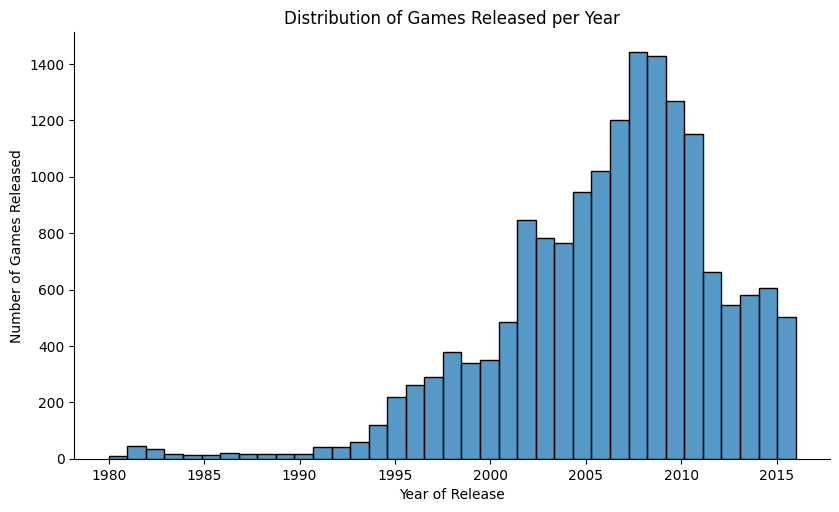

In [66]:
# Plot histogram that shows distribution of game counts per genre
sns.displot(data = df_games, x = 'year_of_release', bins=37, aspect = 1.7,
            edgecolor = 'black')

plt.title('Distribution of Games Released per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')

plt.show()

**Notes over graph above:**
- There are few games released before 1990 in comparison to after 1995 and early 2000s.
- The number of games released increased gradually beginning in 1995 and dramatically after 2000. 
- After the dramatic increase in releases after 2000, there is a peak in 2008.
- From 2012, the number of games released drops significantly at about 550-600 games released each year. 

 ### Global Sales per Platform ###
 <a id='global'></a>

In [67]:
# Create function for bar annotations
def annotate_barplot(ax, fmt='.2f', fontsize=10, color='black', offset=5):
    """
    Annotate bars in a Seaborn barplot.

    Parameters:
    - ax: The axes object of the barplot to annotate.
    - fmt: Format string for the annotation text.
    - fontsize: Font size of the annotation text.
    - color: Color of the annotation text.
    - offset: Offset of the annotation text from the bar (in points).
    """
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{width:{fmt}}', 
                    (x + width, y + height / 2.), 
                    xytext=(offset, 0),  # Offset of the text from points
                    textcoords='offset points',
                    ha='left', va='center', 
                    fontsize=fontsize, color=color)

In [68]:
# Create new df for easy ploting
sales_per_plat = df_games.groupby('platform')['global_sales'].sum().reset_index().sort_values(
    by='global_sales', ascending = False)

C:\Users\marlo\AppData\Local\Temp\ipykernel_28236\131414957.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data = sales_per_plat,
C:\Users\marlo\AppData\Local\Temp\ipykernel_28236\131414957.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data = sales_per_plat,


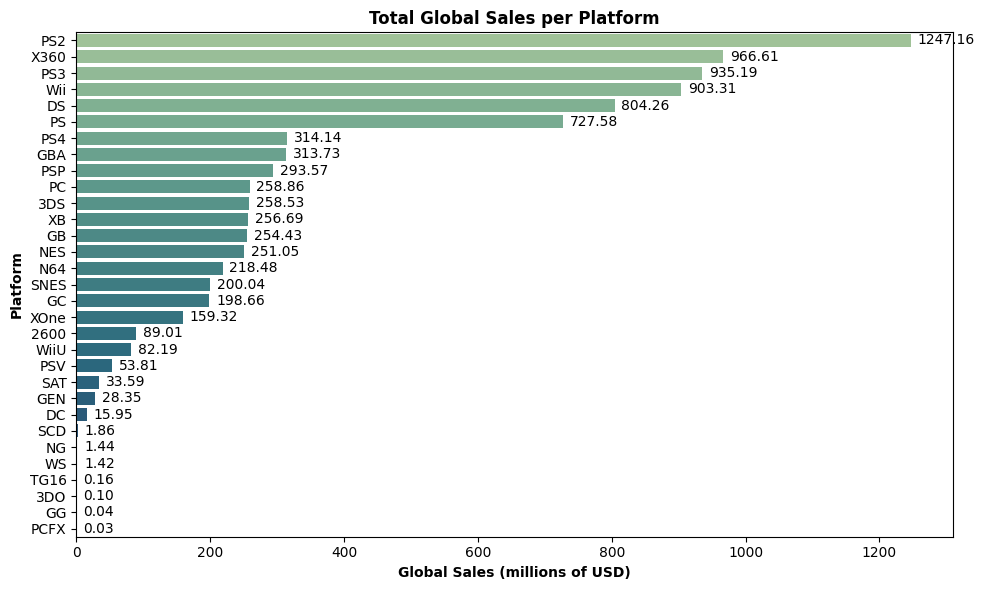

In [69]:
# Plot a chart to show the overall global sales per platform
plt.figure(figsize=(10,6))

barplot = sns.barplot(data = sales_per_plat, 
            x='global_sales', 
            y='platform', 
            ci=None,
            palette='crest')

plt.title('Total Global Sales per Platform', fontweight='bold')
plt.xlabel('Global Sales (millions of USD)',  fontweight='bold')
plt.ylabel('Platform', fontweight='bold')

# Annotate bars
annotate_barplot(barplot)

plt.tight_layout()
plt.show()

The chart above illustrates that from 1980 to 2016, the `PS2`, `X360`, `PS3`, `Wii`, `DS`, and `PS` have outperformed the other platforms in terms of global sales. The `PS2` being the most popular. Which is quite interesting, I assumed before starting the project that the `PC` would be on the rise to becoming the most popular gaming platform, but the data is only until 2016, so our findings make sense compared to my initial assumption. 

In order to analyze and forecast sales for 2017, we will want to take a look at these top 6 performing platforms and try to identify any patterns that may be prevelant in the past years data. 

<a id="error_found"></a>

In [70]:
# set up for a sales heatmap for the six top platforms per year
top_6_base = df_games.query("platform in ['PS2', 'X360','PS3','Wii','DS','PS']")

# Break this down by sales
top_6_plats = top_6_base.pivot_table(index='platform',
                                     columns = 'year_of_release',
                                     values = 'global_sales',
                                     aggfunc = 'sum')

top_6_plats

year_of_release,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,147.23,145.36,119.56,85.35,26.33,11.67,1.54,NaN,NaN,NaN
PS,6.03,35.96,94.7,136.17,169.49,144.53,96.37,35.59,6.67,2.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,NaN,NaN,NaN,NaN,NaN,NaN,39.17,166.43,208.36,193.05,...,76.10,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.19,118.79,130.93,142.96,157.98,108.28,113.25,47.76,16.82,3.60
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,153.41,177.68,206.97,128.67,59.79,22.94,8.59,3.75,1.14,0.18
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.41,136.07,120.82,170.55,145.23,100.72,88.58,34.74,11.96,1.52


It appears there is a `DS` sale in 1985, which can not be possible unless there is a different platform the the same label as `DS`. I'm going to remove this sale since it is not logically plausible. This will be placed in Section 3 so that it carries down into the rest of the graphs and data. 

[Go to Error Correction Point](#error_section)

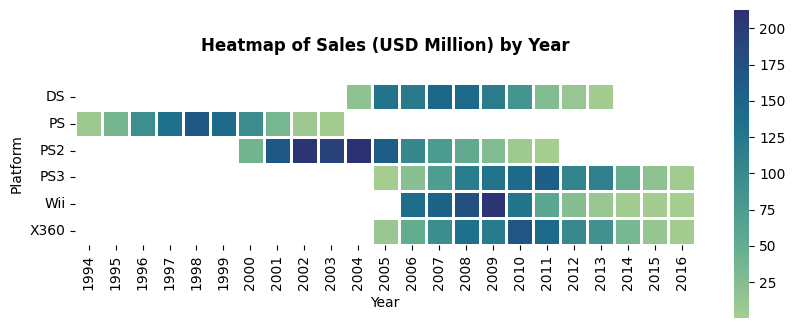

In [71]:
# Plot the sales heatmap
plt.figure(figsize = (10,4))

sns.heatmap(top_6_plats, square = True, linewidth = 1, cmap='crest')

plt.title('Heatmap of Sales (USD Million) by Year', fontweight = 'bold', y=1.15)
plt.xlabel('Year')
plt.ylabel('Platform')

plt.show()

**Heatmap Conclusion**

This chart illustrates a alot of powerful information. We can clearly see the lifespan of each platform in addition to the time periods in which sales were greater than others, and espeically in comparison to each other in the later years on the chart. There's a couple of other realizations we can make from this chart:
- The `DS`, `PS`, and `PS2` are no longer generating sales. 
- Typically, a platform has a growth period, a peak period, and then a decline period, we can see on this chart that the three active platforms in the top 6 are already into their decline period or at the end of their lifespan altogether. 
- Average lifespan coming from only the 3 inactive platforms would be 10 years, and an average lifespan including all platforms would be 10.3 years, so it appears a successful platform has a lifespan of 10 years on average. 
- There is one platform that has an exception to the generalization above and that would be `Wii` as this platform did not have a gradual growth period like the others, and instead had a rapid growth period which is represented by the immediate dark colors on the chart, and was able to hold onto this hype and continue to grow into a peak and then gradually declined. 
- Looking at the most successful platform, the `PS2`, we can see a more rapid growth period than other platforms, and a dominant lead for the next 5 years. This is portrayed by the darker squares that last for multiple years, unlike any other platform. 

Considering these conclusions, to forecast sales for 2017, we will focus on the most recent `three` years of data. This will allow us to identify any platforms that are either in a growth period or in a decline period and will fade out. Since 2016 is incomplete, we will analyze the data from 2013 to 2016 inclusive.

In [72]:
# Create new dataframe of our final data
final_data = df_games.query("year_of_release >= 2013")

final_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_count,decade,critic_score_fix,user_score_fix,global_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,5,2010s,97.0,8.2,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,5,2010s,97.0,8.1,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,5,2010s,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,1,2010s,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,5,2010s,97.0,8.3,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,1,2010s,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,6,2010s,73.0,2.6,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,6,2010s,71.0,2.6,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,unknown,6,2010s,NaN,NaN,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,5,2010s,82.0,4.3,8.58


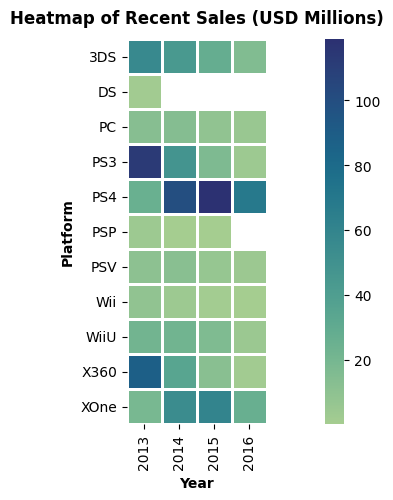

In [73]:
# Plot a sales heatmap for all platforms
plt.figure(figsize=(15,5))

final_plats = final_data.pivot_table(index='platform',
                                     columns='year_of_release',
                                     values='global_sales',
                                     aggfunc='sum')

sns.heatmap(final_plats, square = True, linewidth = 1, cmap='crest')

plt.title("Heatmap of Recent Sales (USD Millions)", fontweight='bold', y=1.02)
plt.xlabel("Year", fontweight='bold', labelpad=5)
plt.ylabel("Platform", fontweight='bold')

plt.show()

**Heatmap Conclusion:**

It appears that the `PS3` and `X360` are currently, and already have been in their decline period, so they will likely fall out in the coming years, especially with the `PS4` in the middle of it's peak period. It also is important to note that the `PS4` has a much more dominant peak than the `XONE` with the same life-span. It seems `PS4` is the current best known choice for ICE to release its game one, but `XOne` would be a good option too in addition to the `PS4`.

In [74]:
final_plat_sales_mean = final_data.pivot_table(index = ['platform','year_of_release'],
                                               values = 'global_sales',
                                               aggfunc  = ['sum','mean']).reset_index()

final_plat_sales_mean.columns = ['platform','year','yearly_total_game_sales','yearly_avg_game_sales']

final_plat_sales_mean.head()

,platform,year,yearly_total_game_sales,yearly_avg_game_sales
0,3DS,2013,56.57,0.621648
1,3DS,2014,43.76,0.547000
2,3DS,2015,27.78,0.323023
3,3DS,2016,15.14,0.329130
4,DS,2013,1.54,0.192500


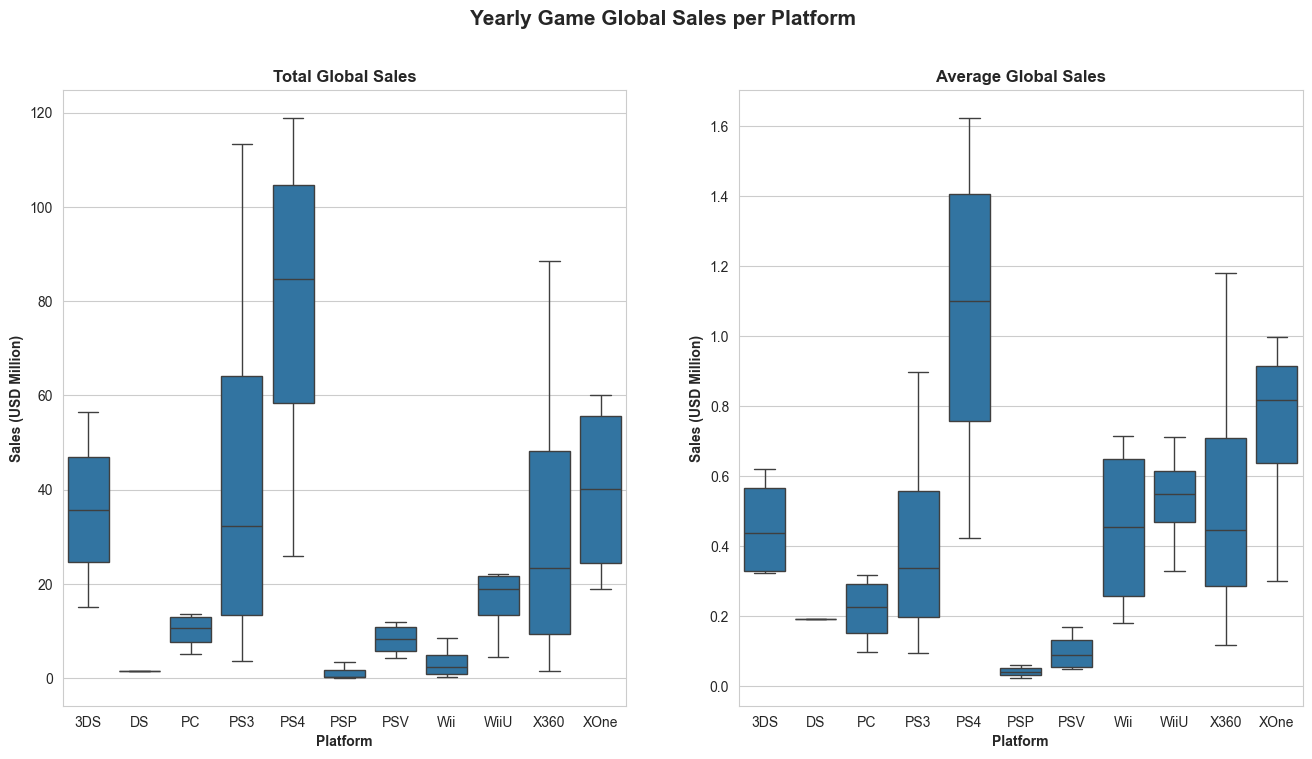

In [75]:
# Create box plots
sns.set_style('whitegrid')
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,8))

sns.boxplot(data = final_plat_sales_mean,
            x = 'platform',
            y = 'yearly_total_game_sales',
            ax = ax1)

sns.boxplot(data = final_plat_sales_mean,
            x = 'platform',
            y = 'yearly_avg_game_sales',
            ax = ax2)

fig.suptitle("Yearly Game Global Sales per Platform", fontweight = 'bold', fontsize = 15)

ax1.set_title("Total Global Sales", fontweight = 'bold')
ax1.set_xlabel("Platform", fontweight = 'bold')
ax1.set_ylabel("Sales (USD Million)", fontweight='bold')

ax2.set_title("Average Global Sales", fontweight = 'bold')
ax2.set_xlabel("Platform", fontweight = 'bold')
ax2.set_ylabel("Sales (USD Million)", fontweight='bold')

plt.show()

**Box plot conclusion:**

From 2013 to 2016, in terms of total game sales, the `PS3` and `PS4` were/are the leading platforms, followed closely by the `X360`; the `3DS` and `XOne` are another tier behind these platforms, the bottom tier of the top platforms, if you will. However, in terms of the average game sales, the `PS4` is significantly out performing the other top platforms such as the `XOne`, `X360`, `PS3`, and the `Wii`. Importantly, the `Wii` and `WiiU` did not have high total game sales, but had average game sales on par with the other top performing platforms (not the `PS4`, that lies in a tier on its own). This may have been because the `Wii` and `WiiU` had fewer games released compared dto the other top platforms, but the individual sales were quite strong. We should not underestimate the potential of these two platforms. 

This information should prove valuable to ICE's marketing team. 

## Effect of User and Critic Reviews on Sales ##
<a id='score_effect'></a>

We will use the most popular platform to conduct this analysis, the `PS4`. This should provide us with a relevant reference of information.

In [76]:
# Create ps4 data
ps4_only = df_games.query("platform == 'PS4'")
ps4_only.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_count,decade,critic_score_fix,user_score_fix,global_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,5,2010s,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,5,2010s,97.0,8.3,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,5,2010s,82.0,4.3,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,3,2010s,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,5,2010s,83.0,5.7,7.66


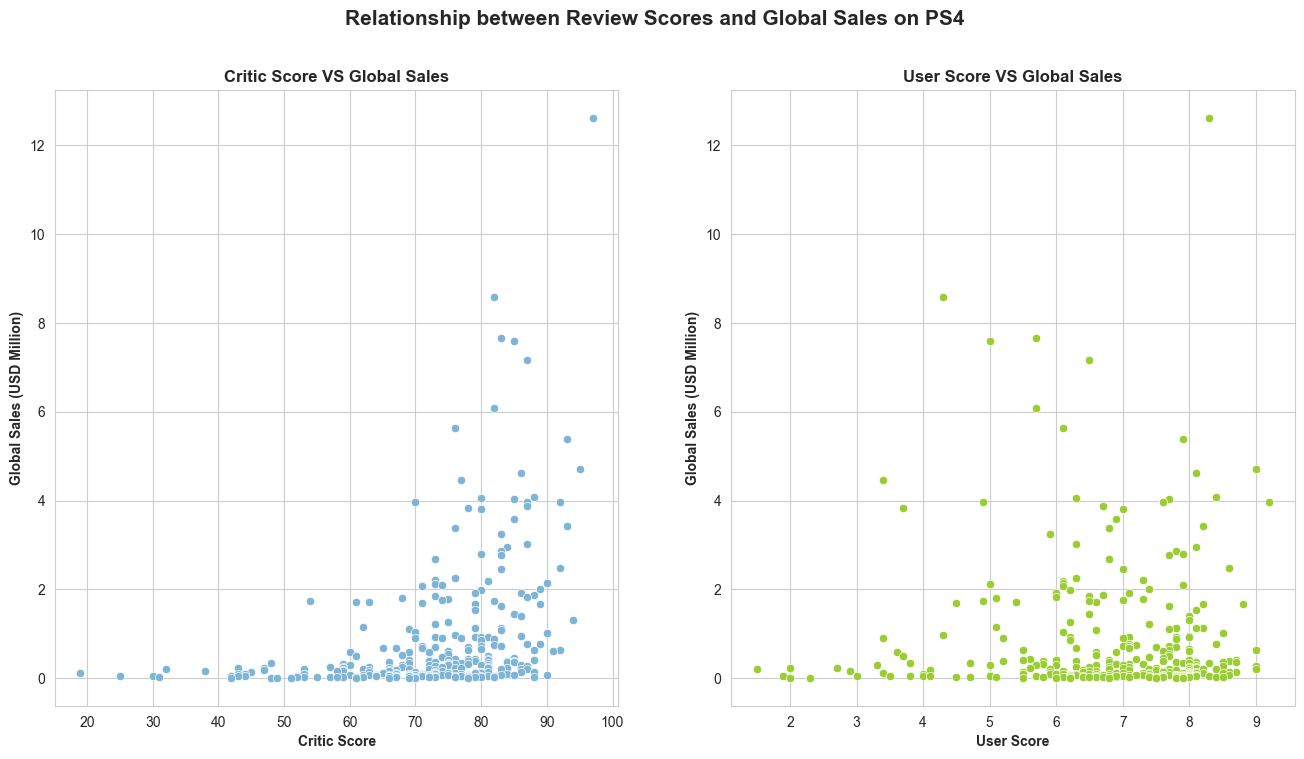

In [77]:
# Create scatter plots to compare global sales and review scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,8))

sns.scatterplot(data = ps4_only, x= 'critic_score_fix',
                y = 'global_sales', color = '#7EB5D6', ax = ax1)

sns.scatterplot(data = ps4_only, x= 'user_score_fix',
                y = 'global_sales', color = '#9ACD32', ax = ax2)

fig.suptitle("Relationship between Review Scores and Global Sales on PS4",
             fontsize = 15, fontweight = 'bold')

ax1.set_title("Critic Score VS Global Sales", fontweight = 'bold')
ax1.set_xlabel("Critic Score", fontweight = 'bold')
ax1.set_ylabel("Global Sales (USD Million)", fontweight = 'bold')

ax2.set_title("User Score VS Global Sales", fontweight = 'bold')
ax2.set_xlabel("User Score", fontweight = 'bold')
ax2.set_ylabel("Global Sales (USD Million)", fontweight = 'bold')

plt.show()

**Score Relationship Conclusion:**
- There does not appear to be a relationship between `sales` and `critic scores` below 50. However, there does seem to be a minor/moderate positive relationship between `sales` and `critic scores` above 50. 
- There does not appear to be a relationship between `sales` and `user scores`. User scores may not affect the sales on the `PS4` platform. 

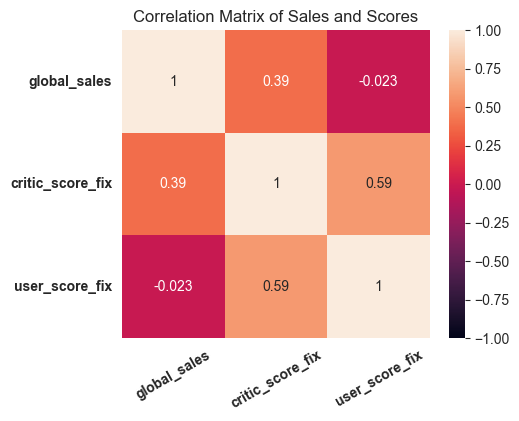

In [78]:
# calculate correlation coefficients between scores and sales
num_var_2 = ['global_sales', 'critic_score_fix', 'user_score_fix']

plt.figure(figsize = (5,4))

sns.heatmap(ps4_only[num_var_2].corr(), vmin=-1, vmax=1, square=True, annot=True)

plt.title("Correlation Matrix of Sales and Scores")
plt.xticks(rotation = 30, fontweight = 'bold')
plt.yticks(rotation = 0, fontweight = 'bold')

plt.show()

The results from this Correlation Coefficient Matrix supports the conclusions made on the scatter plot. 

## Sales of the Same Games from Different Platforms ##
<a id='same_sales'></a>

In [79]:
# Create dataFrame containing sales of a game from different platforms
df_same = final_data.pivot_table(index = 'name',
                                 columns = 'platform',
                                 values = 'global_sales',
                                 aggfunc = 'sum')

df_same.head()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,
Beyblade Burst,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen: Olaf's Quest,0.59,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/2 Summer +,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN


In [80]:
# Calculate a total game sales across all platforms
df_same['total_plat_sales'] = df_same.sum(axis = 1)
df_same['total_plat_sales'].head()

name
 Beyblade Burst                0.03
 Fire Emblem Fates             1.67
 Frozen: Olaf's Quest          1.10
 Haikyu!! Cross Team Match!    0.04
1/2 Summer +                   0.01
Name: total_plat_sales, dtype: float64

In [81]:
# Get list of top and middle tier platforms: XOne, 3DS, X360, PS3, PS4
top_plats = ['XOne', '3DS', 'X360', 'PS3', 'PS4']

# Create a DF
top_plat_games = df_same[top_plats + ['total_plat_sales']]

# Get top 8 games which have sales in all 5 platforms
top_plat_games = top_plat_games.dropna().sort_values(by = 'total_plat_sales', ascending = False).head(8)

top_plat_games

platform,XOne,3DS,X360,PS3,PS4,total_plat_sales
name,,,,,,
FIFA 15,2.18,0.46,2.92,4.28,6.08,17.37
FIFA 14,1.16,0.23,4.22,6.46,3.01,16.46
LEGO Marvel Super Heroes,1.05,0.89,2.22,1.83,1.62,9.41
Skylanders SWAP Force,0.31,0.24,1.32,1.02,0.38,6.00
The LEGO Movie Videogame,0.53,0.69,1.27,0.93,0.67,5.09
LEGO Jurassic World,0.66,0.62,0.87,0.85,0.90,4.69
Skylanders: Trap Team,0.37,0.28,0.89,0.67,0.44,4.30
Lego Batman 3: Beyond Gotham,0.44,0.45,0.89,0.73,0.92,4.26


In [82]:
top_plat_games = top_plat_games.drop(columns = ['total_plat_sales'])

top_plat_games = top_plat_games.stack().to_frame().reset_index()
top_plat_games.columns = ['name','platform','global_sales']

In [83]:
top_plat_games.head()

,name,platform,global_sales
0,FIFA 15,XOne,2.18
1,FIFA 15,3DS,0.46
2,FIFA 15,X360,2.92
3,FIFA 15,PS3,4.28
4,FIFA 15,PS4,6.08


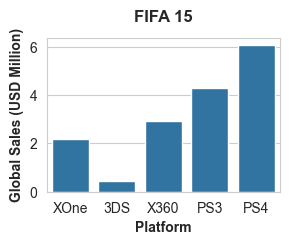

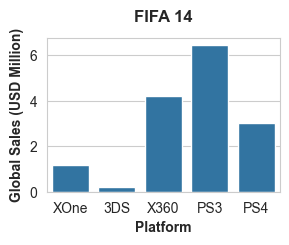

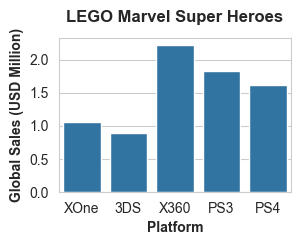

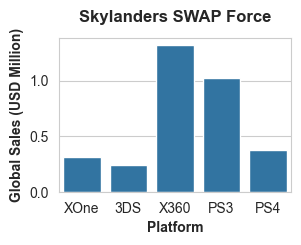

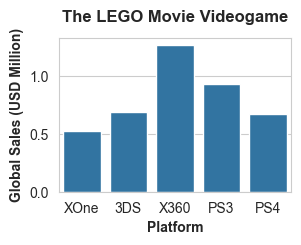

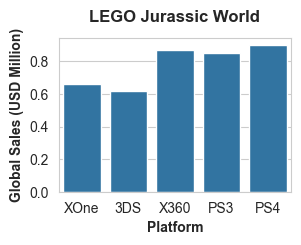

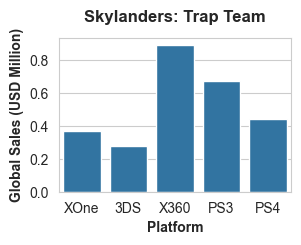

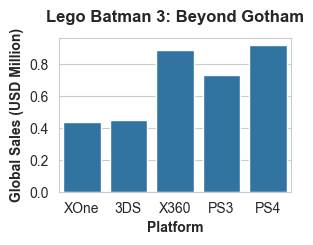

In [84]:
# plot a bar chart for each top game
for game in top_plat_games['name'].unique():
    plt.figure(figsize = (3,2))
    
    sns.barplot(data = top_plat_games.query("name == @game"),
                x = 'platform', y='global_sales')
    
    plt.title(game, fontweight = 'bold', y=1.05)
    plt.ylabel("Global Sales (USD Million)", fontweight = 'bold')
    plt.xlabel("Platform", fontweight = 'bold')
    plt.show()

**Bar Plot Conclusion:**

Comparing the sales across platforms across the top 8 titles, the `X360` platform is in either the first or second spot in 7/8 titles - only one not in first two spots is `FIFA 15`. This implies that the `X360` outperforms other platforms in the top and middle tiers when a game is released across multiple platforms. 

## Distribution of Sales of Games per Genre ##
<a id='sales_per_genre'></a>

C:\Users\marlo\AppData\Local\Temp\ipykernel_28236\3548045629.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  genre_barplot = sns.barplot(data = sorted_final,
C:\Users\marlo\AppData\Local\Temp\ipykernel_28236\3548045629.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  genre_barplot = sns.barplot(data = sorted_final,


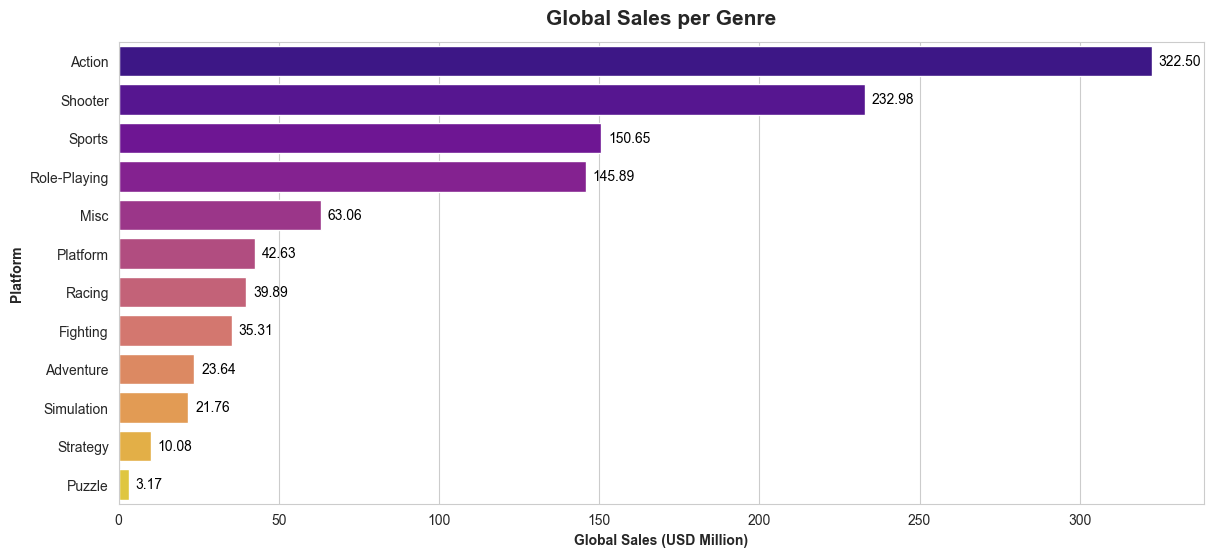

In [85]:
# Plot Bar chart to show distribution of sales of games per genre
sorted_final = final_data.groupby('genre')['global_sales'].sum().reset_index().sort_values(
    by = 'global_sales', ascending = False)

plt.figure(figsize = (14,6))

genre_barplot = sns.barplot(data = sorted_final,
            x = 'global_sales',
            y = 'genre',
            ci = None,
            palette = 'plasma')

plt.title("Global Sales per Genre", fontweight = 'bold', fontsize = 15, y = 1.02)
plt.xlabel("Global Sales (USD Million)", fontweight = 'bold')
plt.ylabel("Platform", fontweight = 'bold')

# Annotate bars
annotate_barplot(genre_barplot)

plt.show()

From 2013 to 2016 the top game genres were `Action`, `Shooter`, `Role-Playing`, and `Sports`. Let's break this down year by year. 

C:\Users\marlo\AppData\Local\Temp\ipykernel_28236\379193045.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  genre_loop_barplot = sns.barplot(data = sort_data.query(f"year_of_release == {year}"),
C:\Users\marlo\AppData\Local\Temp\ipykernel_28236\379193045.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  genre_loop_barplot = sns.barplot(data = sort_data.query(f"year_of_release == {year}"),


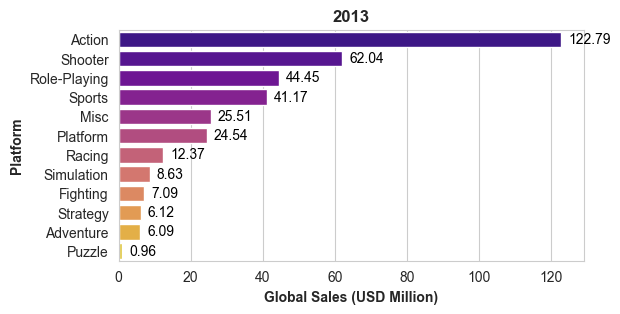

C:\Users\marlo\AppData\Local\Temp\ipykernel_28236\379193045.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  genre_loop_barplot = sns.barplot(data = sort_data.query(f"year_of_release == {year}"),
C:\Users\marlo\AppData\Local\Temp\ipykernel_28236\379193045.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  genre_loop_barplot = sns.barplot(data = sort_data.query(f"year_of_release == {year}"),


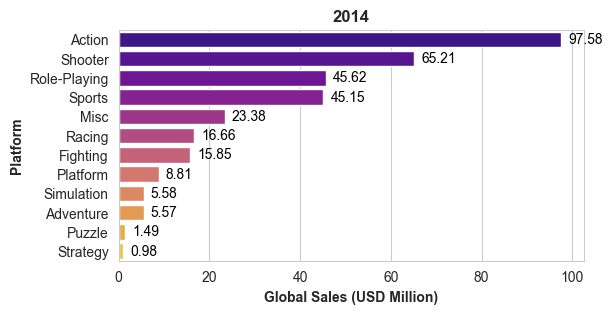

C:\Users\marlo\AppData\Local\Temp\ipykernel_28236\379193045.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  genre_loop_barplot = sns.barplot(data = sort_data.query(f"year_of_release == {year}"),
C:\Users\marlo\AppData\Local\Temp\ipykernel_28236\379193045.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  genre_loop_barplot = sns.barplot(data = sort_data.query(f"year_of_release == {year}"),


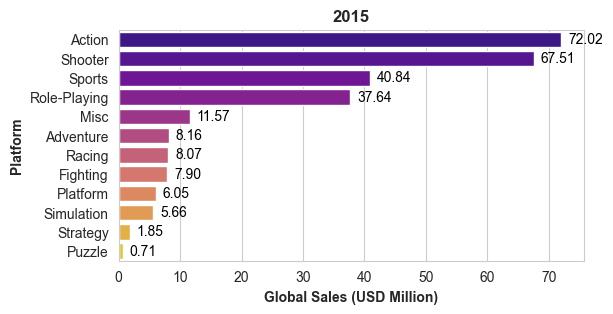

C:\Users\marlo\AppData\Local\Temp\ipykernel_28236\379193045.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  genre_loop_barplot = sns.barplot(data = sort_data.query(f"year_of_release == {year}"),
C:\Users\marlo\AppData\Local\Temp\ipykernel_28236\379193045.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  genre_loop_barplot = sns.barplot(data = sort_data.query(f"year_of_release == {year}"),


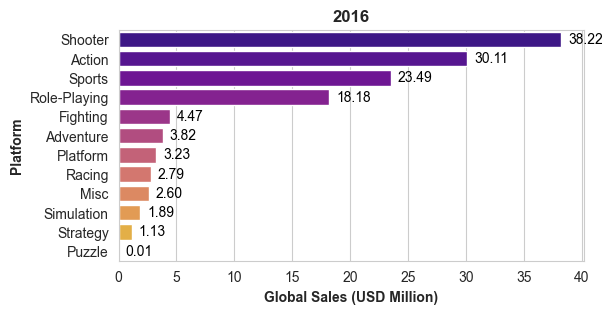

In [86]:
sort_data = final_data.groupby(['genre', 'year_of_release'])['global_sales'].sum().reset_index().sort_values(
    by = 'global_sales', ascending = False)

for year in final_data['year_of_release'].sort_values().unique():

    plt.figure(figsize = (6,3))
    
    genre_loop_barplot = sns.barplot(data = sort_data.query(f"year_of_release == {year}"),
            x = 'global_sales',
            y = 'genre',
            ci = None,
            palette = 'plasma')
    
    plt.title(int(year), fontweight = 'bold')
    plt.xlabel("Global Sales (USD Million)", fontweight = 'bold')
    plt.ylabel("Platform", fontweight = 'bold')
    
    annotate_barplot(genre_loop_barplot)
    
    plt.show()

From 2013 to 2016 we can see that the most popular genres have consistently been `Shooter`, `Action`, `Sports`, and `Role-Playing` while `Strategy` and `Puzzle` have consistently been the least performing. `Action` has been dominating in sales until 2015 when `Shooter` took over. However, those two genres can sometimes be synonymous. 

In [87]:
final_genre_sales_mean = final_data.pivot_table(index = ['genre','year_of_release'],
                                               values = 'global_sales',
                                               aggfunc  = ['sum','mean']).reset_index()

final_genre_sales_mean.columns = ['genre','year','yearly_total_game_sales','yearly_avg_game_sales']

C:\Users\marlo\AppData\Local\Temp\ipykernel_28236\2476583837.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sort_data_2, x='genre', y='global_sales', palette='plasma')


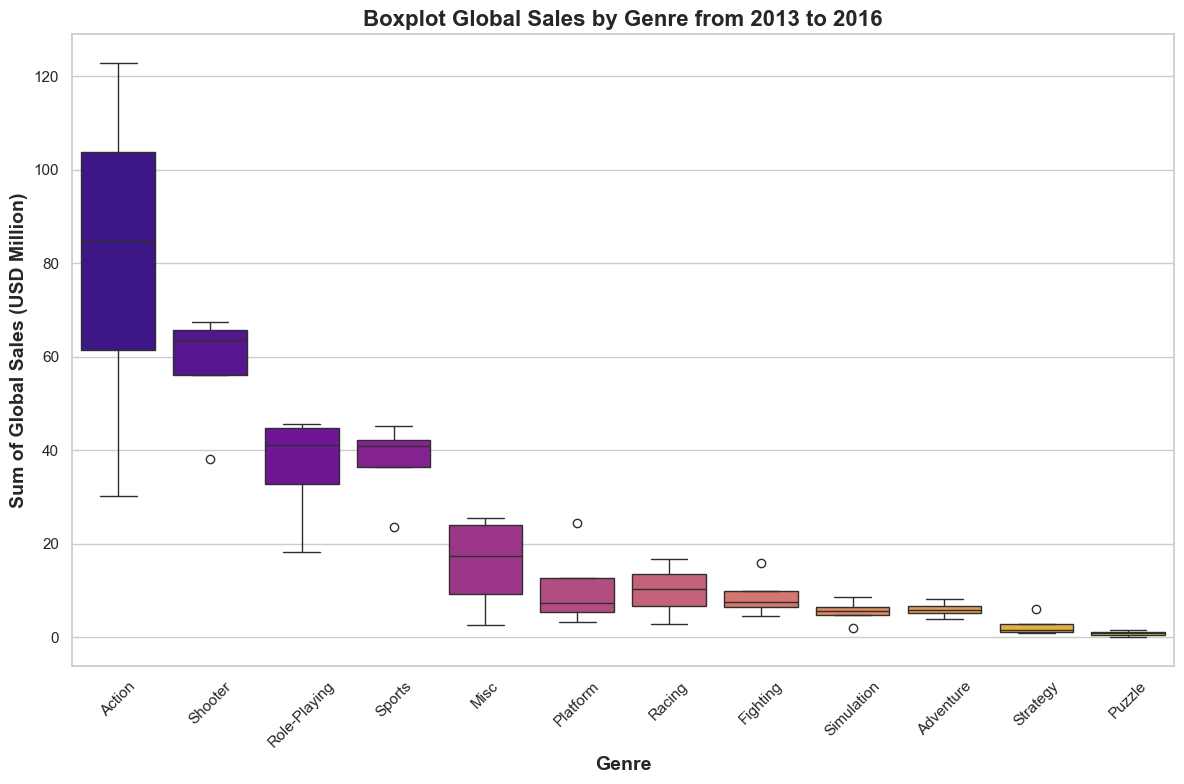

In [88]:
sort_data_2 = final_data.groupby(['genre', 'year_of_release'])['global_sales'].sum().reset_index().sort_values(
    by='global_sales', ascending=False)

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.boxplot(data=sort_data_2, x='genre', y='global_sales', palette='plasma')

plt.title('Boxplot Global Sales by Genre from 2013 to 2016', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Sum of Global Sales (USD Million)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Expanding the scope to a non year-by-year basis we can see how massive of a hold the `Action` genre has on the overall market. Let's see what this looks like for only the past year, so from 2015-2016.

C:\Users\marlo\AppData\Local\Temp\ipykernel_28236\2571024810.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sort_data_2, x='genre', y='global_sales', palette='plasma')


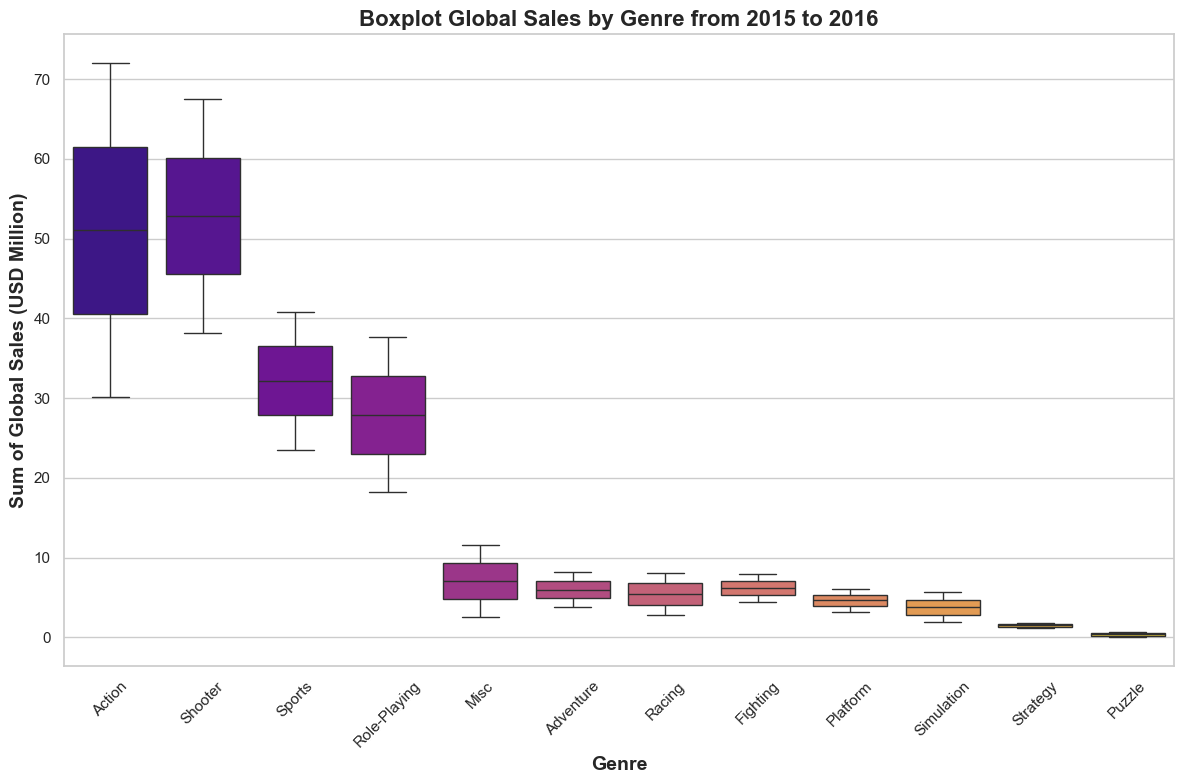

In [89]:
final_data_box = final_data.query("year_of_release >= 2015")
sort_data_2 = final_data_box.groupby(['genre', 'year_of_release'])['global_sales'].sum().reset_index().sort_values(
    by='global_sales', ascending=False)

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.boxplot(data=sort_data_2, x='genre', y='global_sales', palette='plasma')

plt.title('Boxplot Global Sales by Genre from 2015 to 2016', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Sum of Global Sales (USD Million)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Here, we can again see how Shooter is on the rise when narrowing that range of years in our analysis. `Shooter` actually has a higher average than `Action`.

# 5. Regional Sales Analysis #
<a id='region'></a>
_________________________________________________________________________________________________________________________________________________________

To aid in the analysis, the function below automatizes the pie charts that will be used.

In [90]:
def regional_pie(data, compare_column, top=5):
    """
    This function aims to create three pie charts for each regional sale column based on a factor
    """
    
    # Prepare the data
    na_data = final_data.groupby(compare_column)['na_sales'].sum().sort_values().tail(top)
    eu_data = final_data.groupby(compare_column)['eu_sales'].sum().sort_values().tail(top)
    jp_data = final_data.groupby(compare_column)['jp_sales'].sum().sort_values().tail(top)
    
    # Initialize figure
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12,3))
    fig.suptitle(f"Top {compare_column.title()} in Sales per Region", 
                 fontsize = 16, fontweight = 'bold', y = 1.05)
    
    # Plot the three pie charts
    ax1.pie(na_data.values, labels = na_data.index, autopct = "%1.2f%%",
            startangle = 90, shadow = True, explode = (0, 0, 0, 0, 0.1),
            textprops={'fontsize': 7})
    ax1.axis("equal")
    
    ax2.pie(eu_data.values, labels = eu_data.index, autopct = "%1.2f%%",
            startangle = 90, shadow = True, explode = (0, 0, 0, 0, 0.1),
            textprops={'fontsize': 7})
    ax2.axis("equal")
    
    ax3.pie(jp_data.values, labels = jp_data.index, autopct = "%1.2f%%",
            startangle = 90, shadow = True, explode = (0, 0, 0, 0, 0.1),
            textprops={'fontsize': 6})
    ax3.axis("equal")
    
    # Set titles
    ax1.set_title(f"North America: Top {compare_column.title()}", fontsize = 12, fontweight = 'bold')
    ax2.set_title(f"Europe: Top {compare_column.title()}", fontsize = 12, fontweight = 'bold')
    ax3.set_title(f"Japan: Top {compare_column.title()}", fontsize = 12, fontweight = 'bold')
    
    plt.show()

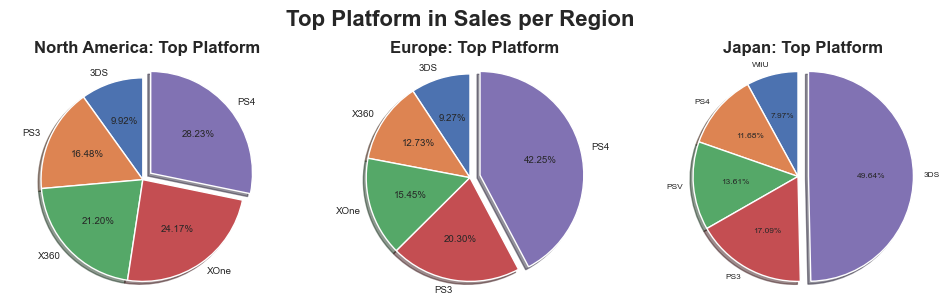

In [91]:
# Find top 5 platforms in each region in terms of sales
regional_pie(final_data, 'platform')

**Pie Chart Conclusion:**

It appears that the `North American` and `European` markets are similar since they are both favoring the same top 3 consoles in their regions: the `X360`, `PS3`, and `PS4`; whereas in `Japan`, the market appears to be quite different in the sense that it is largely mobile based - perhaps a statement on the different cultures and lifestyles within the different regions? There is clearly a different preference on how to play games in `Japan` versus the other two regions.  

## Regional Market Shares per Genre ##
<a id='market_genre'></a>

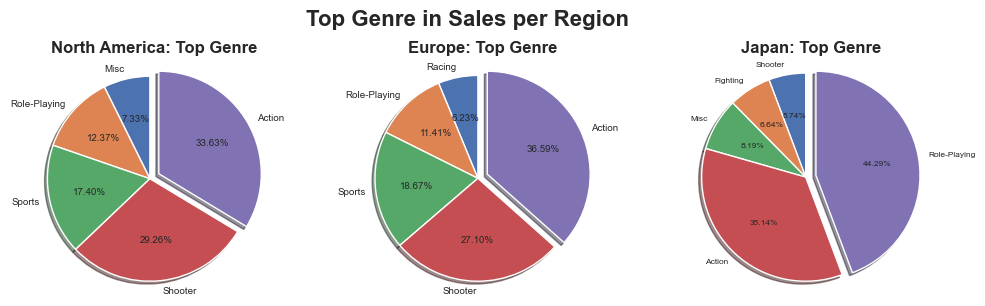

In [92]:
regional_pie(final_data, 'genre')

Once again the `North American` and `European` markets are extremely similar, this time even more so with the same exact order of top genres, just different percentages. Again, the `Japanese` market differs with the 4th most popular genre in the other two markets: `Role-Playing` being the most popular in this market. With `Shooter` or `Sports` not being in the top 5. This creates a more unique market in `Japan`. 

## Relationship between ESRB Rating and Game Sales ##
<a id='rating_sales'></a>

C:\Users\marlo\AppData\Local\Temp\ipykernel_28236\3944012604.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  plot = sns.barplot(data = esrb_data, x = 'rating', y = 'sales', ci = False)


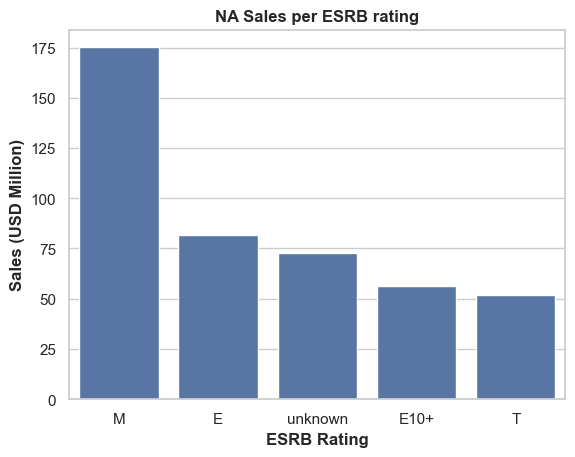

C:\Users\marlo\AppData\Local\Temp\ipykernel_28236\3944012604.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  plot = sns.barplot(data = esrb_data, x = 'rating', y = 'sales', ci = False)


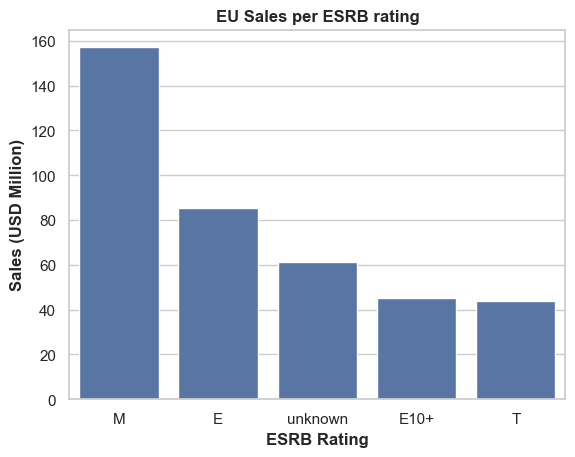

C:\Users\marlo\AppData\Local\Temp\ipykernel_28236\3944012604.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  plot = sns.barplot(data = esrb_data, x = 'rating', y = 'sales', ci = False)


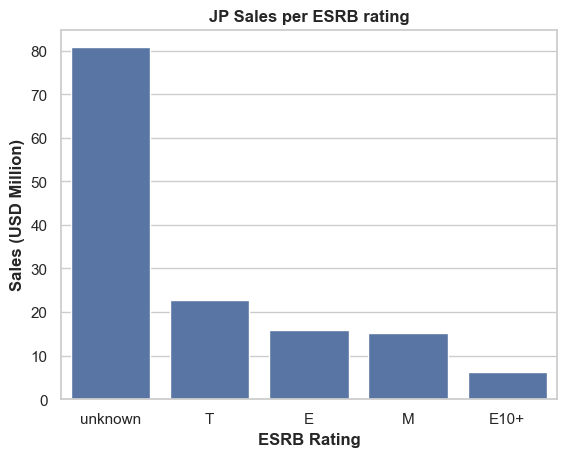

In [93]:
# Plot bar charts for the three regions to compare sales per rating
regional_sales = ['na_sales', 'eu_sales', 'jp_sales']

for region in regional_sales:
    title = region.split("_")[0].upper()
    
    esrb_data = final_data.groupby('rating')[region].sum().sort_values(ascending = False).reset_index()
    esrb_data.columns = ['rating', 'sales']
    
    plot = sns.barplot(data = esrb_data, x = 'rating', y = 'sales', ci = False)
    
    plt.title(f"{title} Sales per ESRB rating", fontweight = 'bold')
    plt.xlabel("ESRB Rating", fontweight = 'bold')
    plt.ylabel("Sales (USD Million)", fontweight = 'bold')
    
    plt.show()

**Bar Plot Conclusion:**

From 2011 to 2016, each region had a dominant `ESRB` rating associated with the highest sales. The `North American` and `European` regions favored the `M` rating, whereas the `Japanese` region favored `T` and `E`: `T` being the greater sale generator, but not by much. Also, all three regions had `RP` at negligable. This makes sense as it's usually only a promotional rating - which is temporary; or for games with no rating, which is considerably few compared to the whole. 

It appears Japan does not entirely focus on the ESRB rating system. Perhaps there is another system that is more popular. I looked it up and it looks like CERO does most of their ratings. Interesting! It's hard to make an actual conclusion on which rating is most popular in Japan, we would have to assume their market is similar to either NA or EU, which we have seen that it is not. So I am not comfortable in making that assumption. If we did, then we could assume it would be M as well, like the other two regions, but again, this may not be accurate.

# 6. Hypothesis Testing # 
<a id='hypo'></a>
_________________________________________________________________________________________________________________________________________________________

In [94]:
# Create function for ease of hypothesis testing
def calc_stats(df, group, group_items, variable, show_stats=True, 
               show_hist = False, run_levene=False, run_test=False, equal_var=True, alpha = 0.05):
    """
    This function will calculate the mean, variance, and standard deviation of a variable for two groups.
    
    Parameters:
    df (DataFrame)     - The dataframe containing the data to perform calculations with
    group (str)        - The column you want to group the data by
    group_items (list) - The list of items you want to perform the testing between: should be two variables for our purposes
    variable (str)     - The column name representing the variable for which to calculate the statistics
    show_stats (bool)  - Lets the function know whether you just want statistics or if false, 
                            then it will produce graphs for the two variables
    show_hist (bool)   - Set to true if you want to display histograms between two groups
    run_levene (bool)  - Set to true to run Levene Test on variances
    equal_var (bool)   - Set to false if variances are not equal from Levene Test
    alpha
    
    This function will return a series of strings that contains the 3 statistics for each group
    """
    
    # Filter the data for each group and drop any missing values; creates series objects
    data_0 = df[df[group] == group_items[0]][variable].dropna()
    data_1 = df[df[group] == group_items[1]][variable].dropna()
    
    # Calculate statistics for the first group
    count_0 = data_0.count()
    mean_0 = np.mean(data_0)
    var_0 = np.var(data_0, ddof=1) #ddof=1 is the sample variance
    std_0 = np.std(data_0, ddof=1)
    
    # Calculate statistics for the second group
    count_1 = data_1.count()
    mean_1 = np.mean(data_1)
    var_1 = np.var(data_1, ddof=1)
    std_1 = np.std(data_1, ddof=1)
    
    if show_stats: # get stats with no graphs
        
        #print the results
        print(f"Number of {variable} in {group_items[0]}: {count_0}")
        print(f"Mean of {variable} in {group_items[0]}: {mean_0:.2f}")
        print(f"Variance of {variable} in {group_items[0]}: {var_0:.4f}")
        print(f"Standard deviation of {variable} in {group_items[0]}: {std_0:.4f}")
        print("_"*53, "\n")
        print(f"Number of {variable} in {group_items[1]}: {count_1}")
        print(f"Mean of {variable} in {group_items[1]}: {mean_1:.2f}")
        print(f"Variance of {variable} in {group_items[1]}: {var_1:.4f}")
        print(f"Standard deviation of {variable} in {group_items[1]}: {std_1:.4f}")
        print("_"*53, "\n")
        print(f"The ratio of the two variances is {var_0 / var_1:.4f}")

    # This section of the function will produce two histograms for the two groups to confirm normal distributions
    # as well as test if variances are equal via Levene's Test
    if show_hist: 
        
        # Set up figure
        sns.set_style('whitegrid')
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
        
        # Plot the histograms
        sns.histplot(data = data_0, bins = sturges_rule(count_0), 
                     kde = True, color = 'skyblue', ax = ax1)
        
        sns.histplot(data = data_1, bins = sturges_rule(count_1), 
                     kde = True, color = 'lightcoral', ax = ax2)
        
        # Establish parameters
        fig.suptitle("Distribution of the Two Samples", fontsize = 15, fontweight = 'bold')
        
        ax1.set_title(f"Sample 1: {group_items[0]} {variable}", fontsize = 12, fontweight = 'bold')
        ax1.set_xlabel(variable, fontweight = 'bold')
        ax1.set_ylabel(f"Number of {variable}", fontweight = 'bold')
        
        ax2.set_title(f"Sample 2: {group_items[1]} {variable}", fontsize = 12, fontweight = 'bold')
        ax2.set_xlabel(variable, fontweight = 'bold')
        ax2.set_ylabel(f"Number of {variable}", fontweight = 'bold')
        
        plt.show()
        
    if run_levene: # Levene Test
        
        levene_result = st.levene(data_0, data_1, center = 'median')
        
        # Show levene result
        print("\n\033[1mLevene Test for Equal Variances:\033[0m")
        print("Null hypothesis: Variances between these two samples is the same.")
        print("Significance level: 0.05")
        print()
        print("p-value: ", levene_result.pvalue)
        
        if levene_result.pvalue < 0.05:
            print("We reject the null hypothesis. We cannot assume the variances are equal.\n")
        else:
            print("We failed to reject the null hypothesis. We can assume the variances are the same.\n")
    
    if run_test: #t-test
        t_result = st.ttest_ind(data_0, data_1, equal_var = equal_var)
        print("\n\033[1mPerforming t-test:\033[0m")
        print('p-value', t_result.pvalue)
        
        if t_result.pvalue < alpha:
            print("We reject the null hypothesis.\n")
        else:
            print("We fail to reject the null hypothesis.\n")

In [95]:
# Create function for Sturge's Rule
def sturges_rule(bin):
    """
    Calculates the number of bins to be used in a histogram based on Sturge's Rule. 
    
    Parameters:
    n (int) : The number of data points.
    """
    
    return int(np.ceil(np.log2(bin) + 1))

# Hypothesis 1: Average User Scores of the Xbox One and PC Platforms are the Same. #
<a id='hyp_1'></a>

In [96]:
# Check statistics of the two samples
calc_stats(final_data, 'platform', ['XOne', 'PC'], 'user_score_fix')

Number of user_score_fix in XOne: 207
Mean of user_score_fix in XOne: 6.61
Variance of user_score_fix in XOne: 1.8967
Standard deviation of user_score_fix in XOne: 1.3772
_____________________________________________________ 

Number of user_score_fix in PC: 160
Mean of user_score_fix in PC: 6.26
Variance of user_score_fix in PC: 3.0432
Standard deviation of user_score_fix in PC: 1.7445
_____________________________________________________ 

The ratio of the two variances is 0.6233


Let the population mean of user scores of the Xbox One platform be $\mu_1$.

Let the population mean of user scores of the PC platform be $\mu_2$.

Let the null hypothesis be $H_0$.

Let the alternate hypothesis be $H_1$

**Sample 1: Xbox One**
- Sample size: $n_1$ = 207
- Sample mean $\bar{x_1}$ = 6.61 million USD
- Sample standard deviation $s_1$ = 1.3772 million USD

**Sample 2: PC**
- Sample size: $n_2$ = 320
- Sample mean $\bar{x_2}$ = 6.46 million USD
- Sample standard deviation $s_2$ = 1.6166 million USD

$H_0$ : $\mu_1$ = $\mu_2$

$H_1$ : $\mu_1 \neq \mu_2$

The two samples are independent and we are testing if their means differ, so we will use a two-sample t-test. 

In order to perform a two-sample t-test, we assume that both samples follow a normal distribution - a histogram will be plotted for each sample to confirm. 

The ratio of the sample variances is 0.7258, which is close to 1, so we can assume that their variances are equal, but we will perform a Levene test to confirm. 

Performing this test, we will use a significance level of 0.05. 

$\alpha$ = 0.05

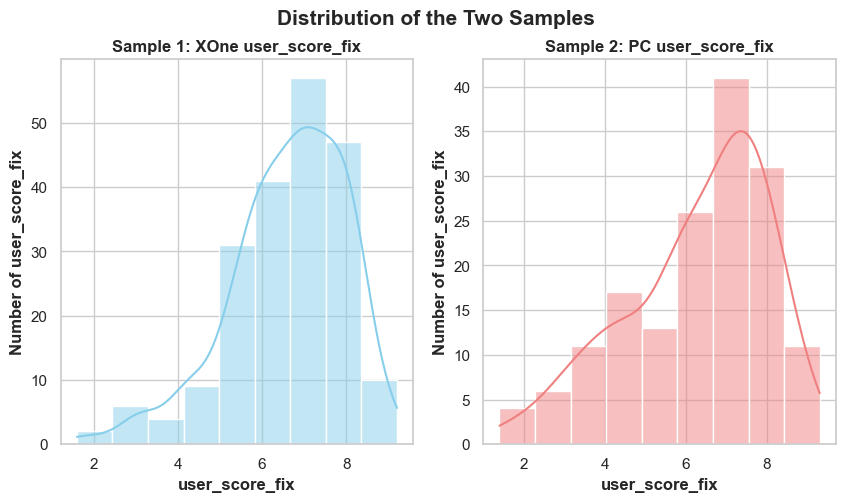

In [97]:
# plots histograms
calc_stats(final_data, 'platform', ['XOne', 'PC'], 'user_score_fix', show_stats=False, show_hist = True)

In [98]:
# Run levene test
calc_stats(final_data, 'platform', ['XOne', 'PC'], 'user_score_fix', 
           show_stats=False, show_hist=False, run_levene=True)


Levene Test for Equal Variances:
Null hypothesis: Variances between these two samples is the same.
Significance level: 0.05

p-value:  0.002441551311939937
We reject the null hypothesis. We cannot assume the variances are equal.



The distributions for the two samples is pretty close to normal, there is some skewness, but not enough to objectify a normal distribution. The Levene Test indicates that there is enough evidence to assume that the variances are not equal. 

In [99]:
# Run t-test
calc_stats(final_data, 'platform', ['XOne', 'PC'], 'user_score_fix', 
           show_stats=False, show_hist=False, run_levene=False,
           run_test=True, equal_var=False)


Performing t-test:
p-value 0.04002828827436067
We reject the null hypothesis.



Since the p-value is greater than our significance level of 0.05, we fail to reject the null hypothesis $H_0$. We do not have enough evidence to conclude that user scores from Xbox One gamers and PC gamers are significantly different. Which makes sense. Overall, these reviews should be similar even though there are games that may have significant performance various between consoles and pcs, generally, the reviews line up. 

# Hypothesis 2: Average User Scores for the Action and Sports Genres are Different. #
<a id='hyp_2'></a>

Number of user_score_fix in Action: 464
Mean of user_score_fix in Action: 6.84
Variance of user_score_fix in Action: 1.8145
Standard deviation of user_score_fix in Action: 1.3470
_____________________________________________________ 

Number of user_score_fix in Sports: 180
Mean of user_score_fix in Sports: 5.18
Variance of user_score_fix in Sports: 3.1121
Standard deviation of user_score_fix in Sports: 1.7641
_____________________________________________________ 

The ratio of the two variances is 0.5830


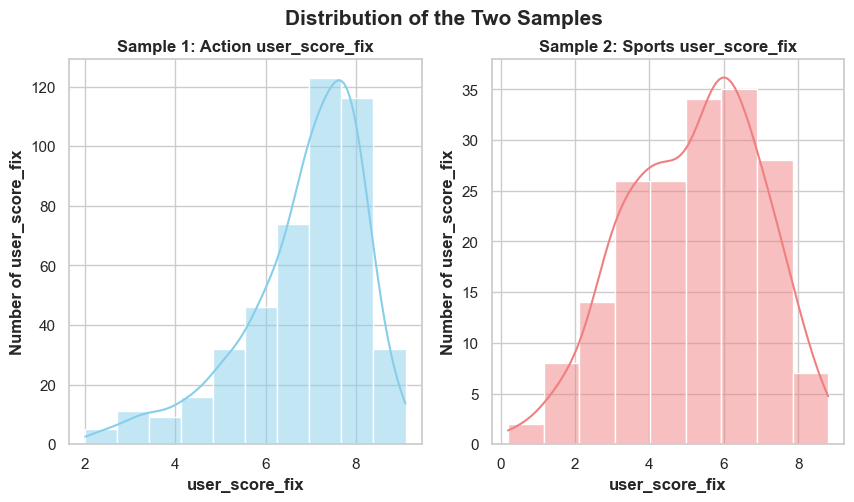


Levene Test for Equal Variances:
Null hypothesis: Variances between these two samples is the same.
Significance level: 0.05

p-value:  9.481554328269721e-08
We reject the null hypothesis. We cannot assume the variances are equal.


Performing t-test:
p-value 6.751840116878863e-25
We reject the null hypothesis.



In [100]:
# Use automation
calc_stats(final_data, 'genre', ['Action', 'Sports'], 'user_score_fix',  show_stats=True, 
           show_hist = True, run_levene=True, run_test=True, equal_var=False, alpha = 0.05)

Let the population mean of user scores of the Action genre be $\mu_1$.

Let the population mean of user scores of the Sports genre be $\mu_2$.

Let the null hypothesis be $H_0$.

Let the alternate hypothesis be $H_1$

**Sample 1: Action**
- Sample size: $n_1$ = 464
- Sample mean $\bar{x_1}$ = 6.84 million USD
- Sample standard deviation $s_1$ = 1.3470 million USD

**Sample 2: PC**
- Sample size: $n_2$ = 180
- Sample mean $\bar{x_2}$ = 5.18 million USD
- Sample standard deviation $s_2$ = 1.7641 million USD

$H_0$ : $\mu_1$ = $\mu_2$

$H_1$ : $\mu_1 \neq \mu_2$

**Since the p-value is less than our significance level of 0.05, we reject the null hypothesis $H_0$. We have enough evidence to conclude that the user scores for action and sports game-genres are significantly different.** 

# 7. Overall Conclusion #
<a id='conclusion'></a>
_________________________________________________________________________________________________________________________________________________________

The information presented in the provided data set was sufficient to conduct the analysis and test the hypothesis. However, there were some minor issues that needed to be addressed. There were wrong data types and a substantial amount of misssing values in the data set.

**Important Findings:**
- The peak for the number of video games sold each year was in 2008. From 2012 and onward, the number of games released each year dropped significantly compared to the peak, but remained consistent at around 550-600 games a year. 
- Across all 36 years of data provided to us, the `PS2`, `X360`, `PS3`, `Wii`, `DS`, and `PS` were the top 6 performing platforms respectively, by a significant margin, in terms of global sales.
- We found out that platforms tend to have about a 2 year growth period and then reach a peak period of popularity. Afterwards, they would gradually fade out from the main line of competition over the next 2-3 years. This is why we focused on the past 5 years of data versus all 36. 
- The `PS3` and `X360` are currently in their decline period and it is likely that they will begin to phase out of the market within the next two - three years.
- The `PS4` and `XOne` are currently on the rise or in their peak period now and likely have another 6-7 years of lifespan, we should focus our campaign on these consoles/platforms. Despite this, the `Wii` and `WiiU` had fewer games released than compared to other top performing platforms, but the individual game sales were very strong. 
- There does appear to be a moderate positive relationship between `critic_score` of 50 and above and `global_sales`, whereas `user_score` may not impact sales. 
- The North American and European regions favored the same three platforms: `X360`, `PS3`, and `PS4`, altough in different ranking orders. In contrast, the Japanese market differed greatly from these regions showing more of a focus on mobile platforms such as the `3DS`, which stands as the sole leader in sales by a large margin. 
- The regional customers, the gamers in North America and Europe, also showed almost identical preference in game `genre`. The top three genres in these two regions were `Action`, `Shooter`, and `Sports`. These 3 genres occupied nearly 80% of the total market. Again, the Japanese regional customers' preferences differed uniquely: with `action` and `role-playing` genres representing 77.3% of the market. 

**Hypothesis Testing**

We tested two hypothesis at a significance level of $\alpha$ = 0.05.

1. Average user scores of the Xbox One and PC platforms are the same. 
2. Average user scores of the Action and Sports genre are the same. 

For the first test, we performed a two-sided t-test and concluded the following:

    Since the p-value is greater than our significance level of 0.05, we fail to reject the null hypothesis $H_0$. We do not have enough evidence to conclude that user scores from Xbox One gamers and PC gamers are significantly different.
    
For the second test, we performed another two-sided t-test and concluded the following:

    Since the p-value is less than our significance level of 0.05, we reject the null hypothesis $H_0$. We have enough evidence to conclude that the user scores for action and sports game-genres are significantly different.